In [1]:
import numpy as np
import pandas as pd

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 365
np.random.seed(seed=1960)
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})
# print(df_train.head(N))


<AxesSubplot:xlabel='Date'>

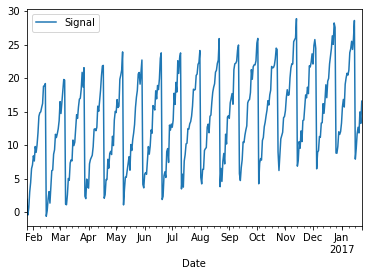

In [2]:
df_train.plot(x='Date', y='Signal')

In [3]:
import pyaf
from pyaf.TS import Signal_Transformation as tstransf

In [4]:
lDict = {
        'None' : tstransf.cSignalTransform_None(),
        'Difference': tstransf.cSignalTransform_Differencing(),
        'RelativeDifference' : tstransf.cSignalTransform_RelativeDifferencing(),
        'Integration' : tstransf.cSignalTransform_Accumulate(),
        'BoxCox_-2' : tstransf.cSignalTransform_BoxCox(-2.0),
        'BoxCox_-1' : tstransf.cSignalTransform_BoxCox(-1.0),
        'BoxCox_0' : tstransf.cSignalTransform_BoxCox(0.0),
        'BoxCox_1' : tstransf.cSignalTransform_BoxCox(1.0),
        'BoxCox_2' : tstransf.cSignalTransform_BoxCox(2.0),
        'Quantization_5' : tstransf.cSignalTransform_Quantize(5),
        'Quantization_10' : tstransf.cSignalTransform_Quantize(10),
        'Quantization_20' : tstransf.cSignalTransform_Quantize(20),
        'Logit' : tstransf.cSignalTransform_Logit(),
        'Fisher' : tstransf.cSignalTransform_Fisher(),
        'Anscombe' : tstransf.cSignalTransform_Anscombe() 
}

lKnonwTranformations = list(lDict.keys())

In [5]:
def create_transformation(iTransfName):
    lDict = {
        'None' : tstransf.cSignalTransform_None(),
        'Difference': tstransf.cSignalTransform_Differencing(),
        'RelativeDifference' : tstransf.cSignalTransform_RelativeDifferencing(),
        'Integration' : tstransf.cSignalTransform_Accumulate(),
        'BoxCox_-2' : tstransf.cSignalTransform_BoxCox(-2.0),
        'BoxCox_-1' : tstransf.cSignalTransform_BoxCox(-1.0),
        'BoxCox_0' : tstransf.cSignalTransform_BoxCox(0.0),
        'BoxCox_1' : tstransf.cSignalTransform_BoxCox(1.0),
        'BoxCox_2' : tstransf.cSignalTransform_BoxCox(2.0),
        'Quantization_5' : tstransf.cSignalTransform_Quantize(5),
        'Quantization_10' : tstransf.cSignalTransform_Quantize(10),
        'Quantization_20' : tstransf.cSignalTransform_Quantize(20),
        'Logit' : tstransf.cSignalTransform_Logit(),
        'Fisher' : tstransf.cSignalTransform_Fisher(),
        'Anscombe' : tstransf.cSignalTransform_Anscombe() 
    }
    return lDict.get(iTransfName)




In [6]:
def plot_transformation(iTransfName):
    lTransform = create_transformation(iTransfName)
    df = df_train.copy()
    lTransform.fit(df['Signal'])
    df[iTransfName + '_Signal'] = lTransform.apply(df['Signal'])
    df[iTransfName + '_Signal_inverted'] = lTransform.invert(df[iTransfName + '_Signal'])
    df[iTransfName + '_Error'] = df[iTransfName + '_Signal_inverted'] - df['Signal']
    # df.plot(x = 'Date', y = ['Signal'])
    df.plot(x = 'Date', y = [iTransfName + '_Signal'], figsize=(24, 16))
    df.plot(x = 'Date', y = ['Signal', iTransfName + '_Signal_inverted', iTransfName + '_Error'], figsize=(24, 16))

    return df

TESTING_TRANSFORMATION None
TESTING_TRANSFORMATION Difference
TESTING_TRANSFORMATION RelativeDifference
TESTING_TRANSFORMATION Integration
TESTING_TRANSFORMATION BoxCox_-2
TESTING_TRANSFORMATION BoxCox_-1
TESTING_TRANSFORMATION BoxCox_0
TESTING_TRANSFORMATION BoxCox_1
TESTING_TRANSFORMATION BoxCox_2
TESTING_TRANSFORMATION Quantization_5
TESTING_TRANSFORMATION Quantization_10


/home/antoine/.local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


TESTING_TRANSFORMATION Quantization_20
TESTING_TRANSFORMATION Logit
TESTING_TRANSFORMATION Fisher
TESTING_TRANSFORMATION Anscombe


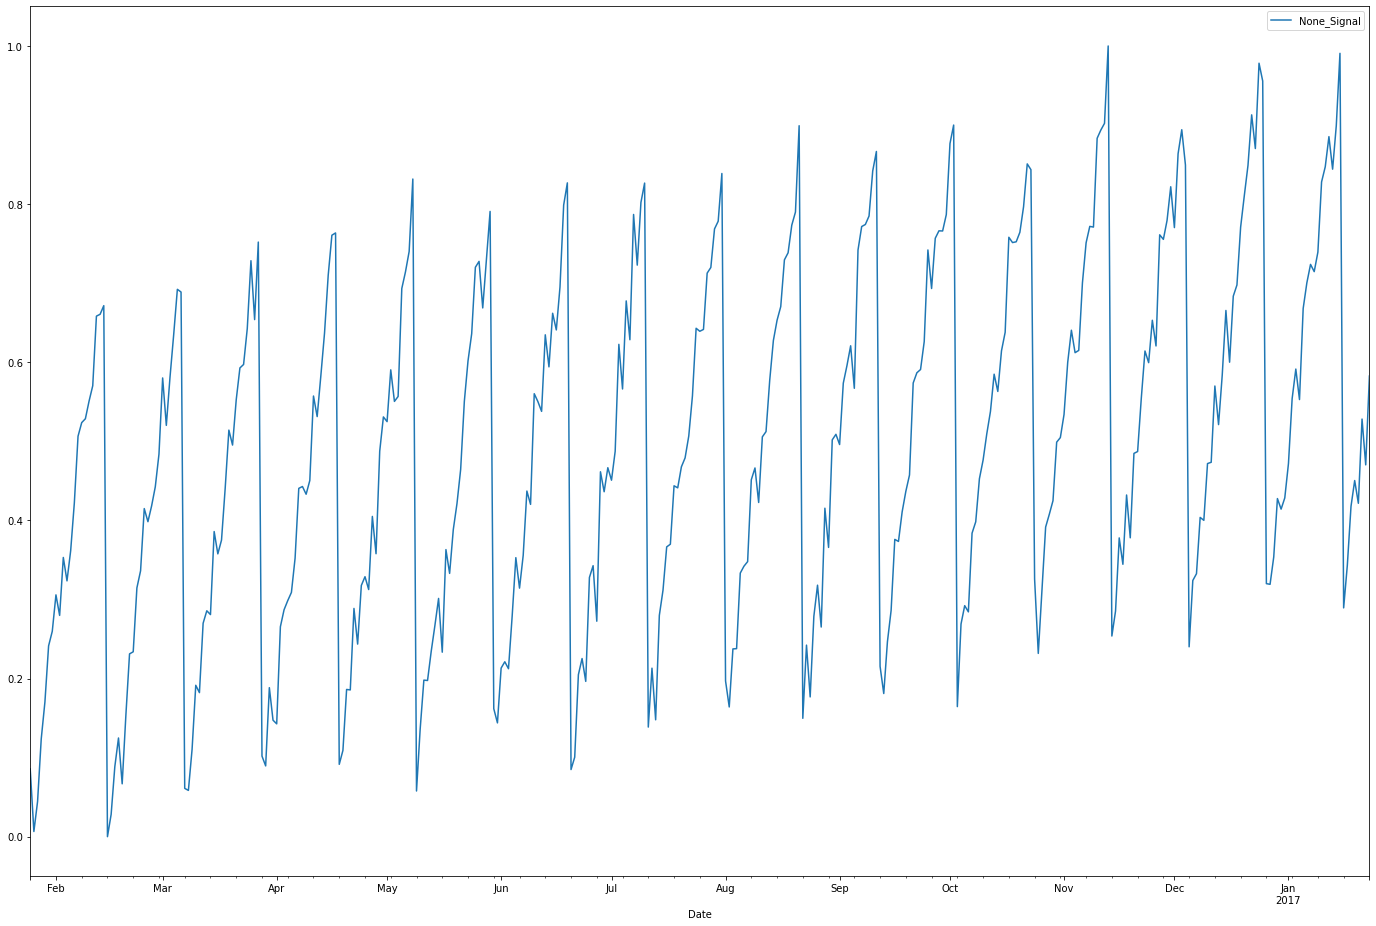

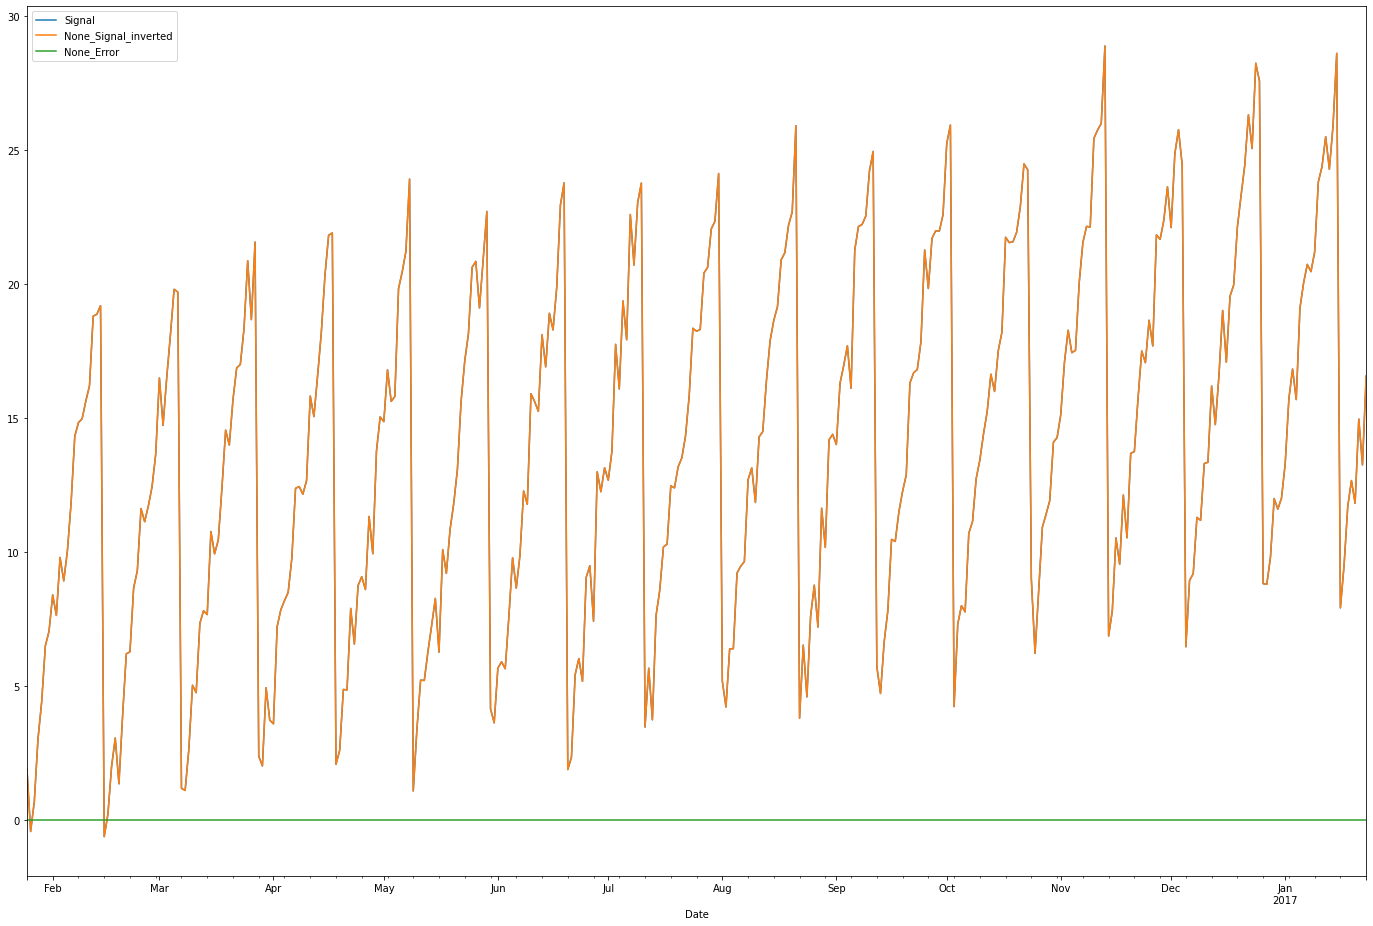

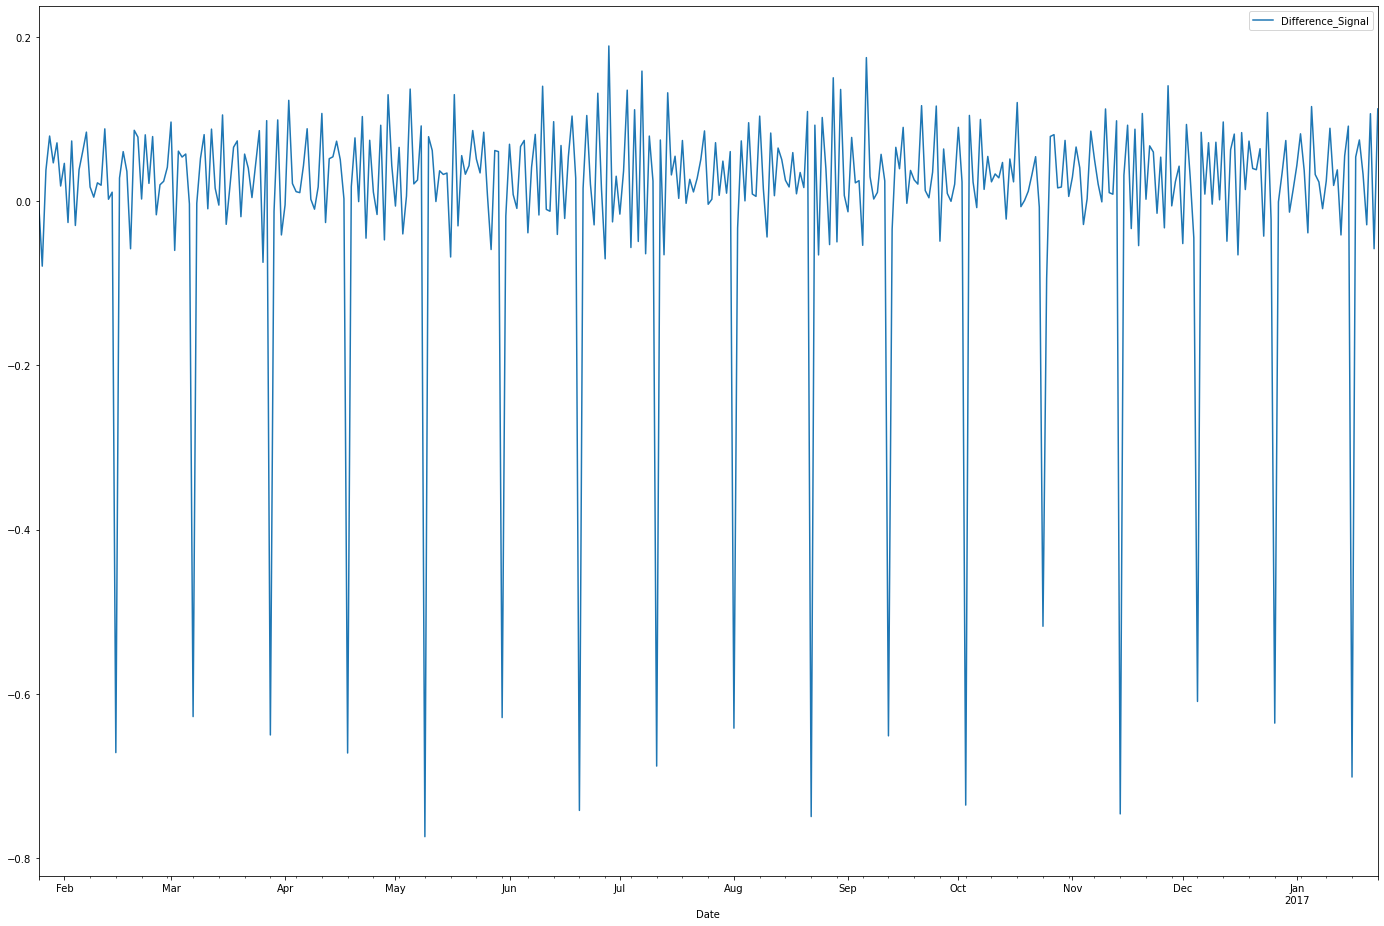

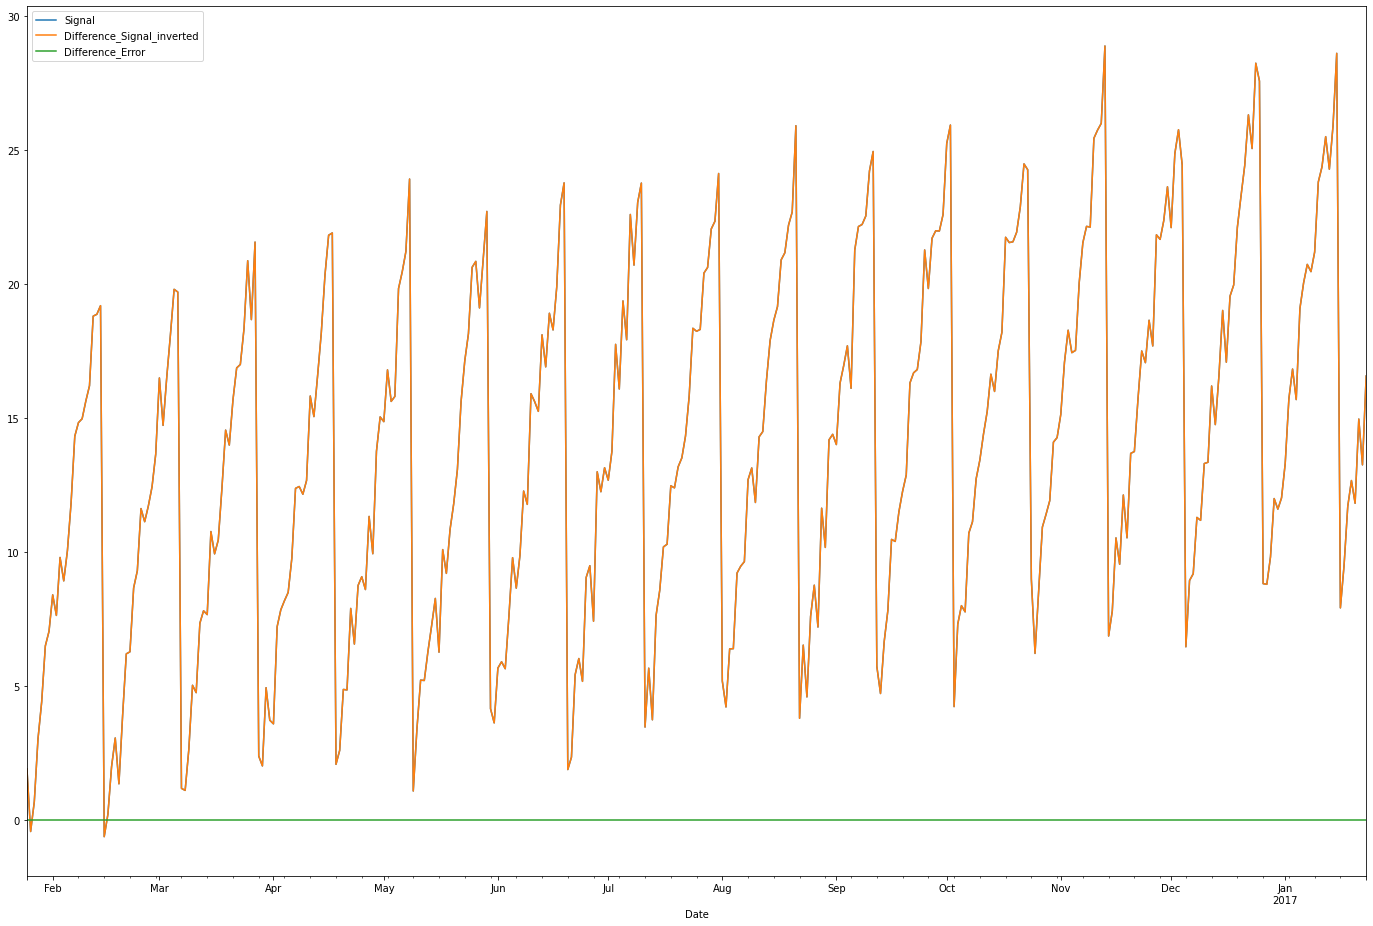

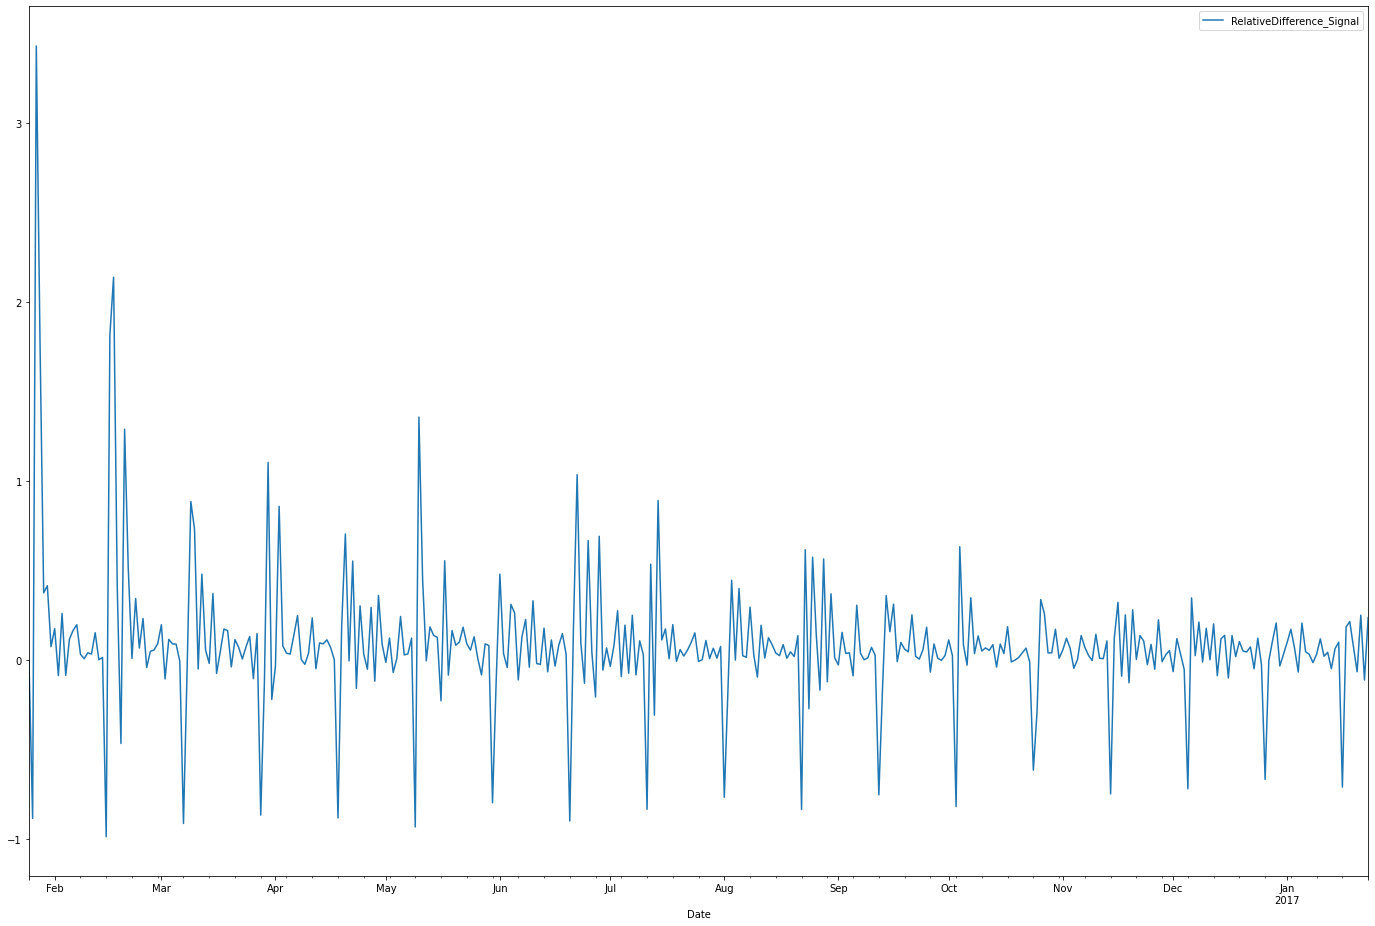

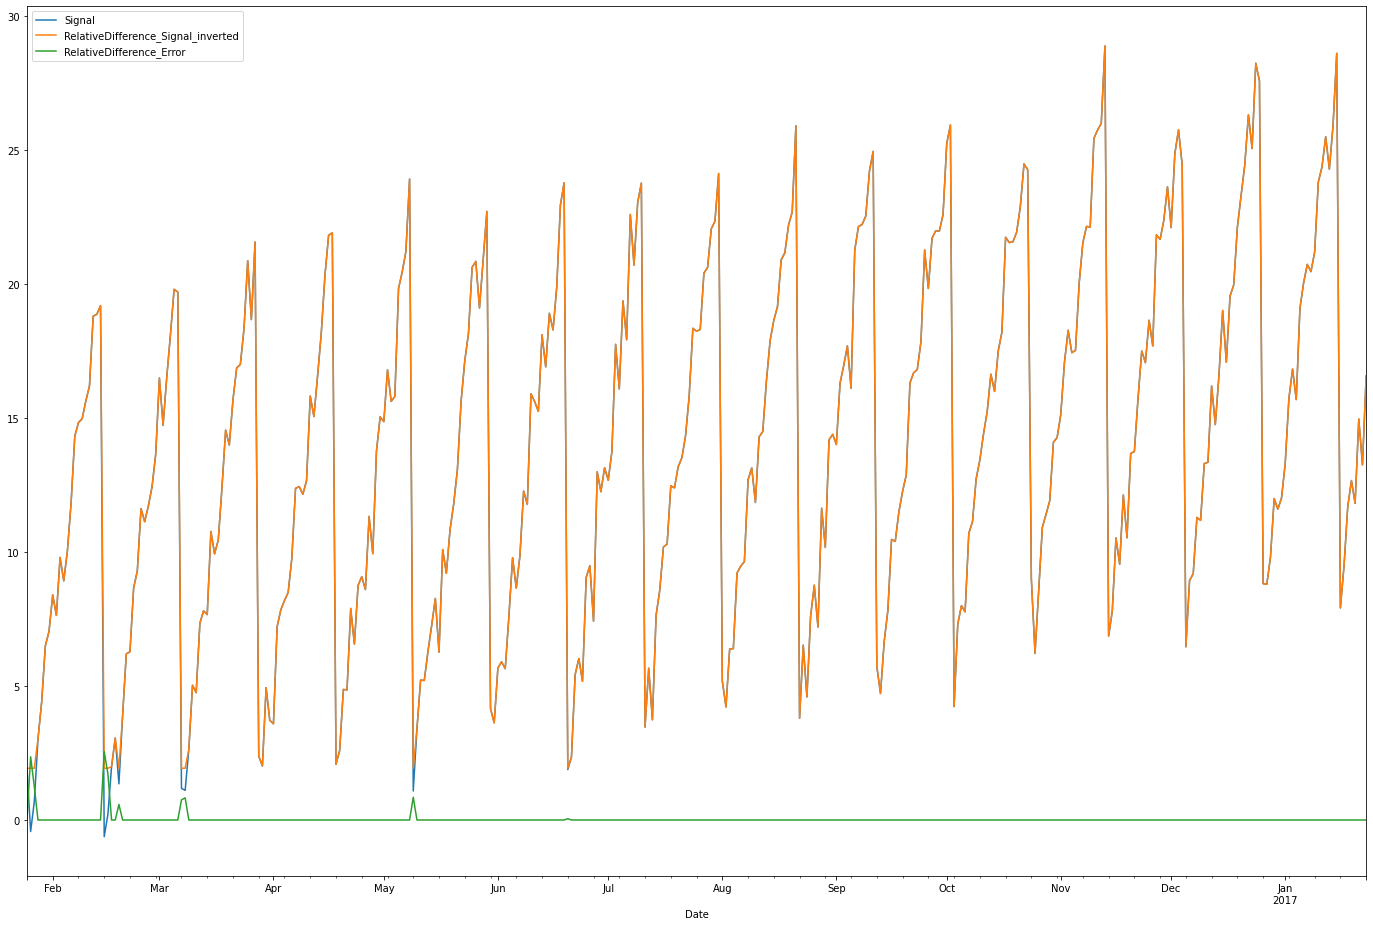

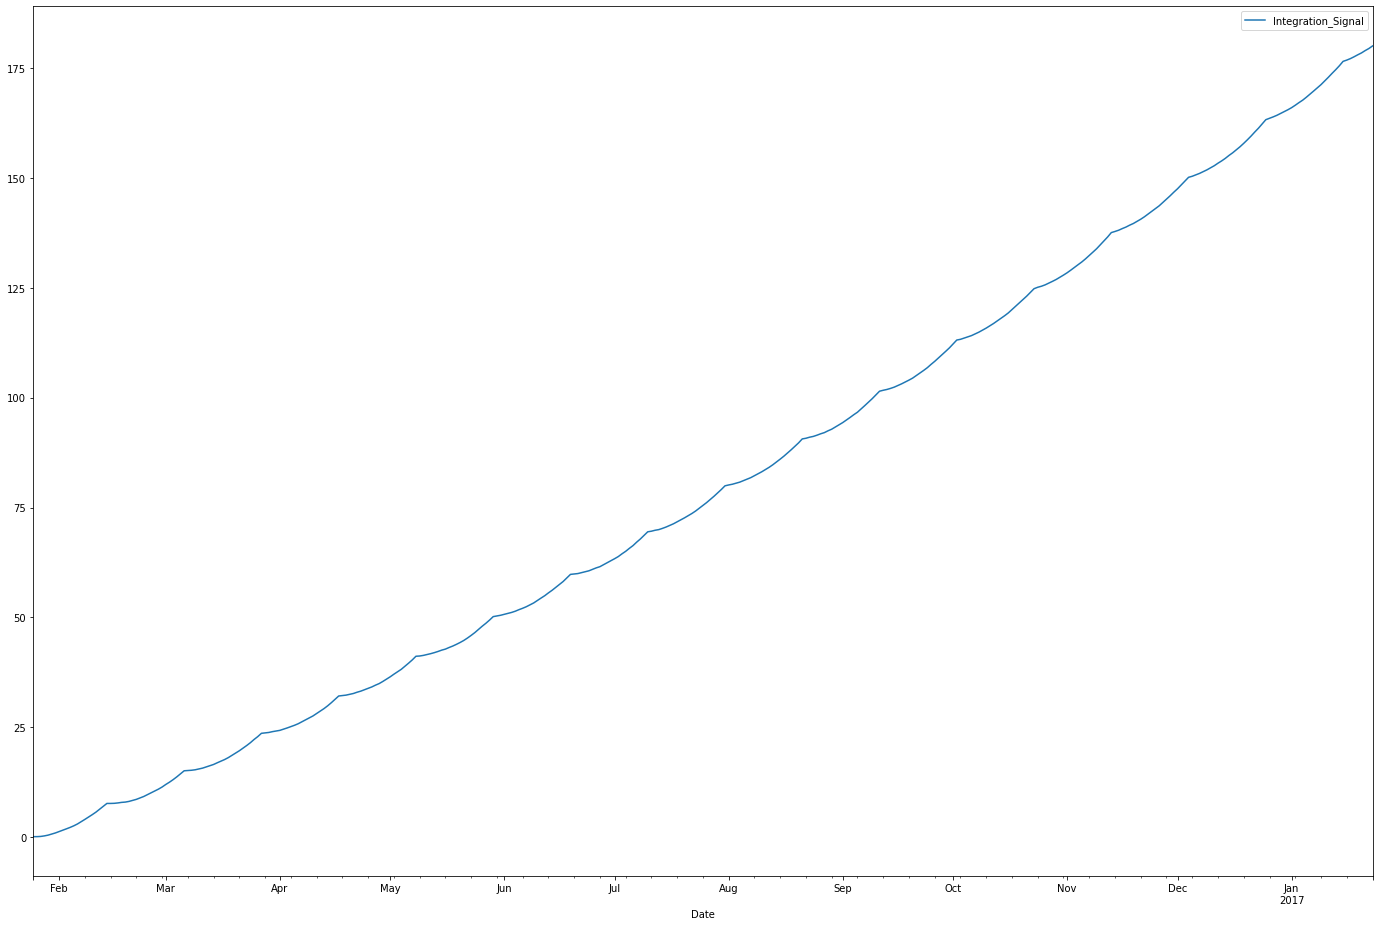

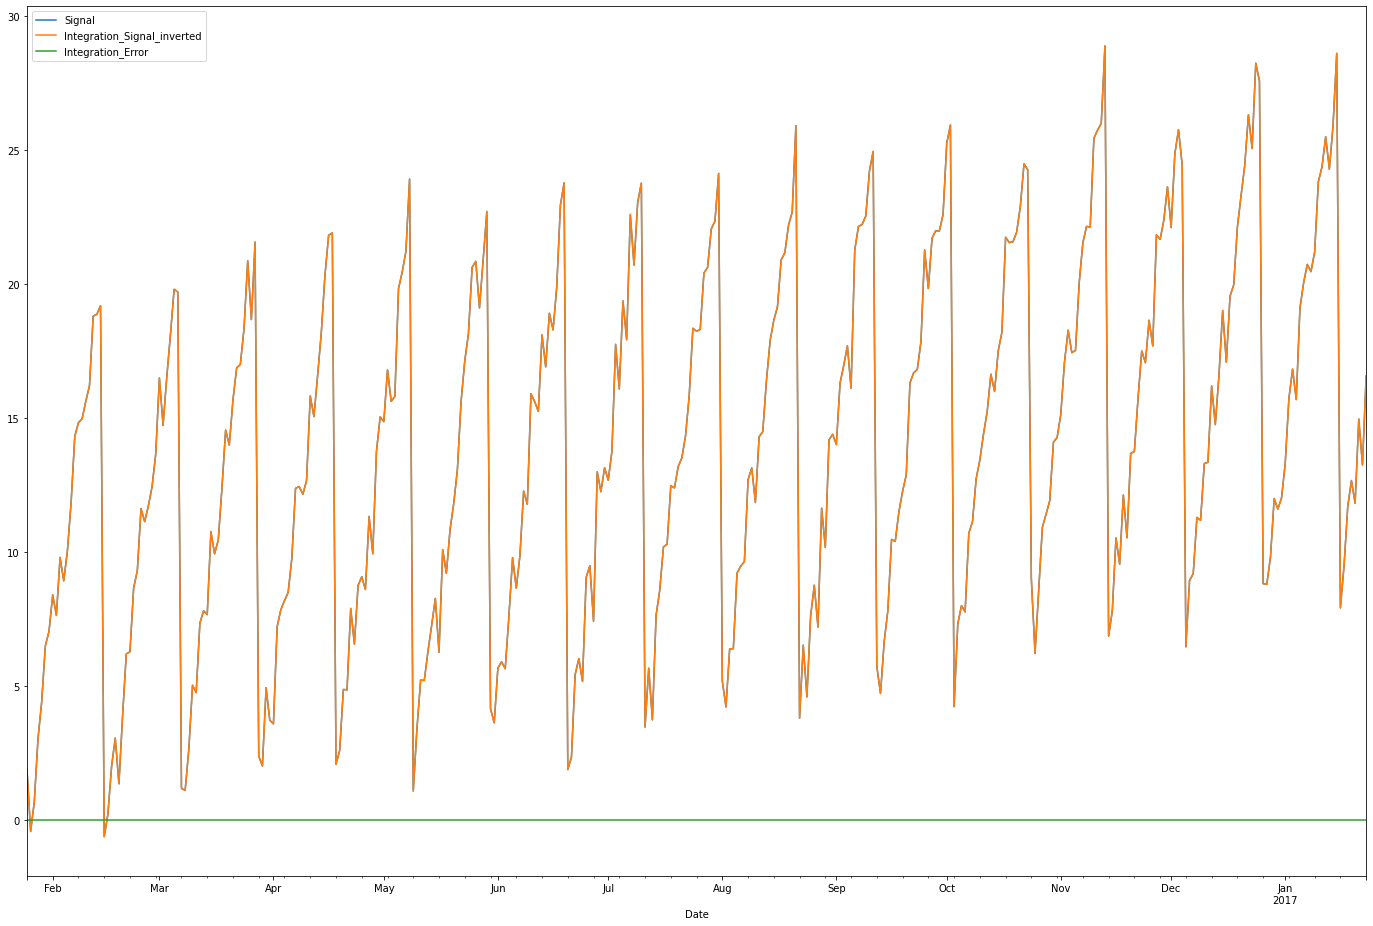

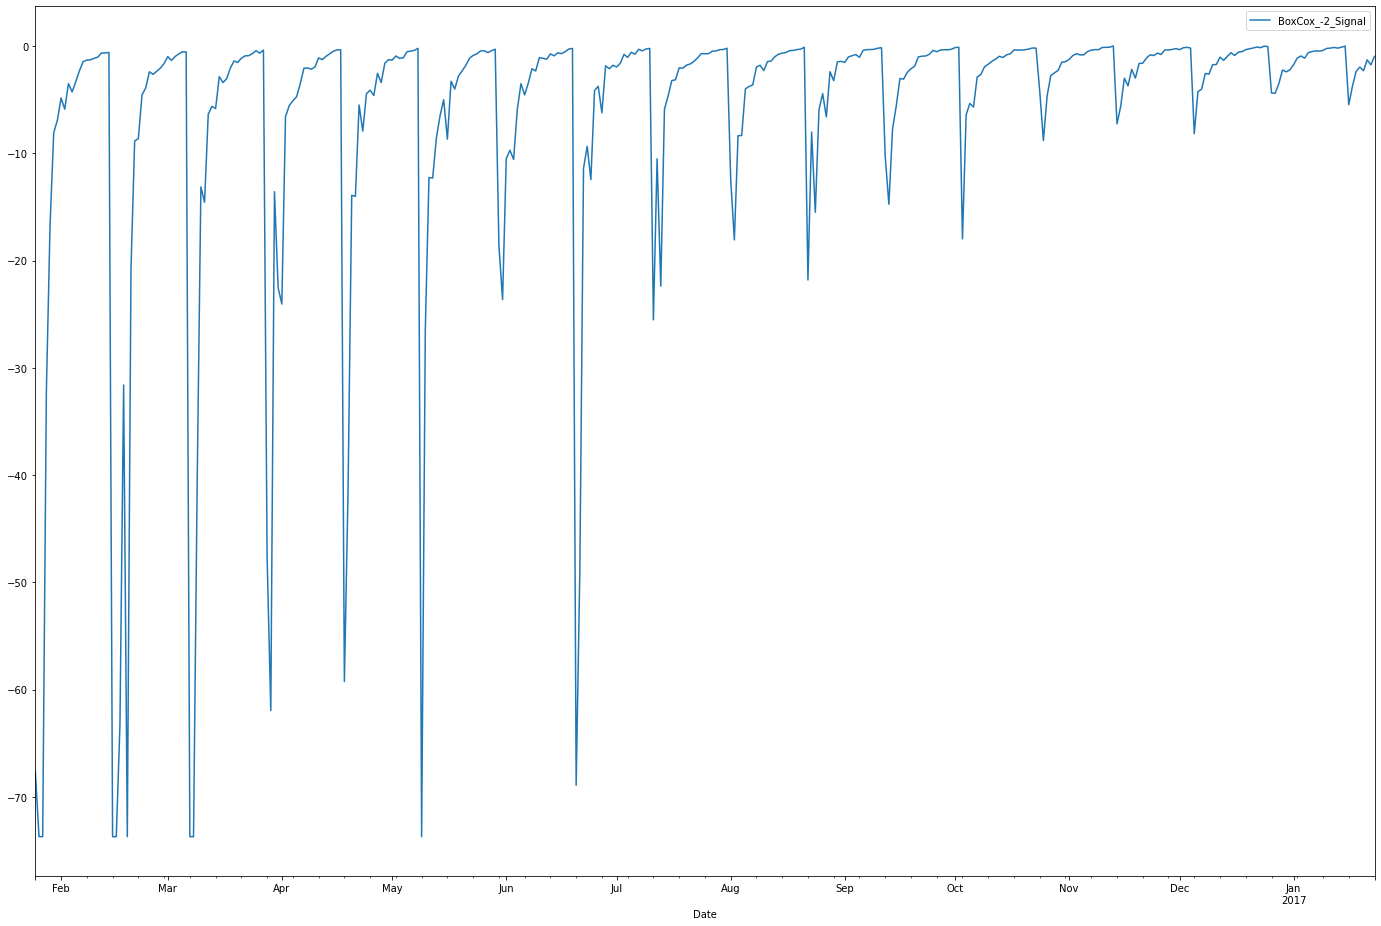

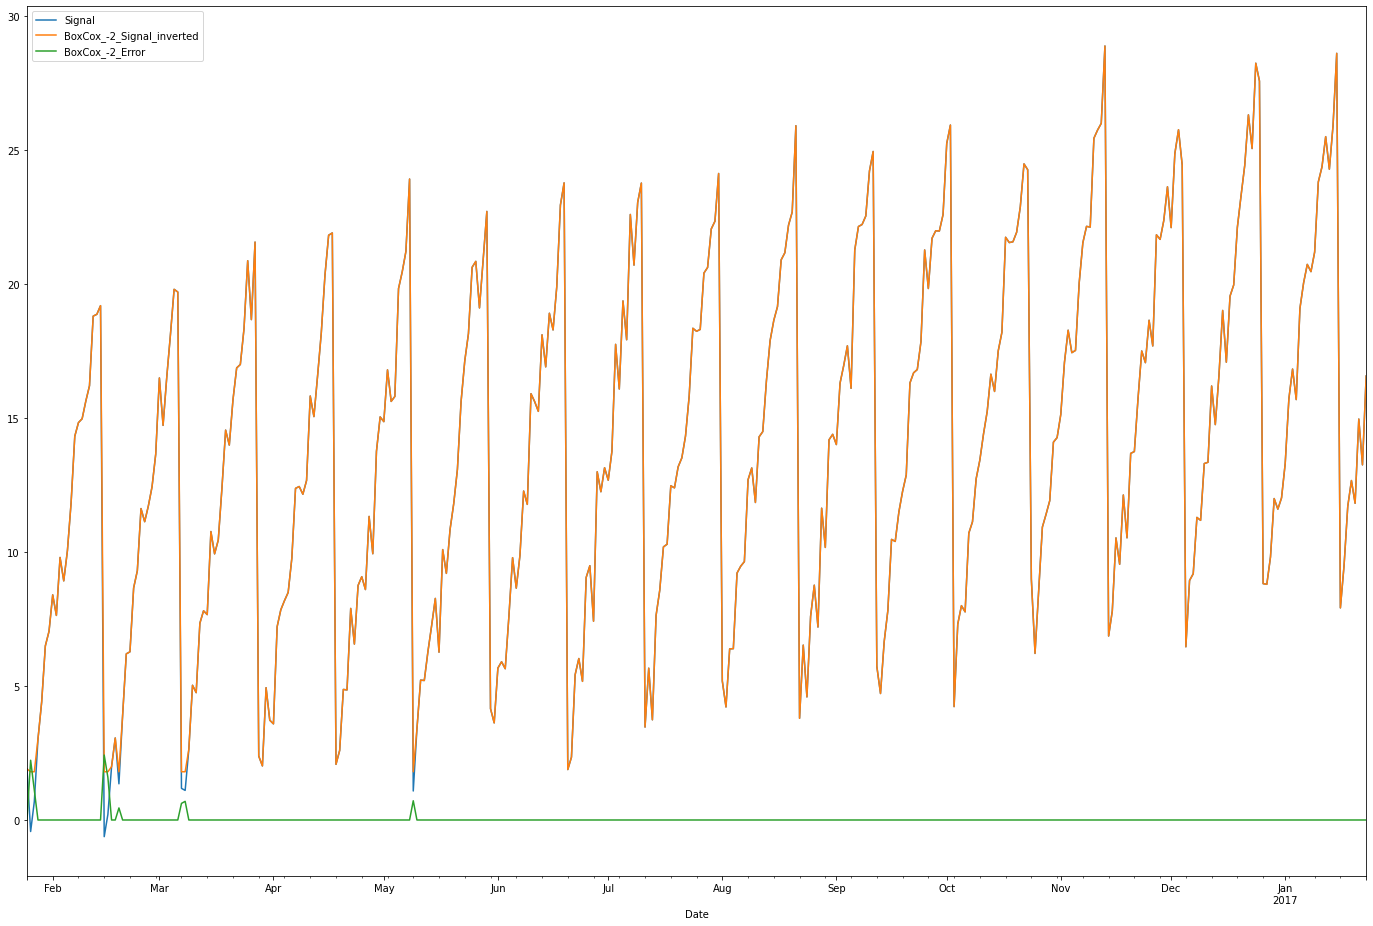

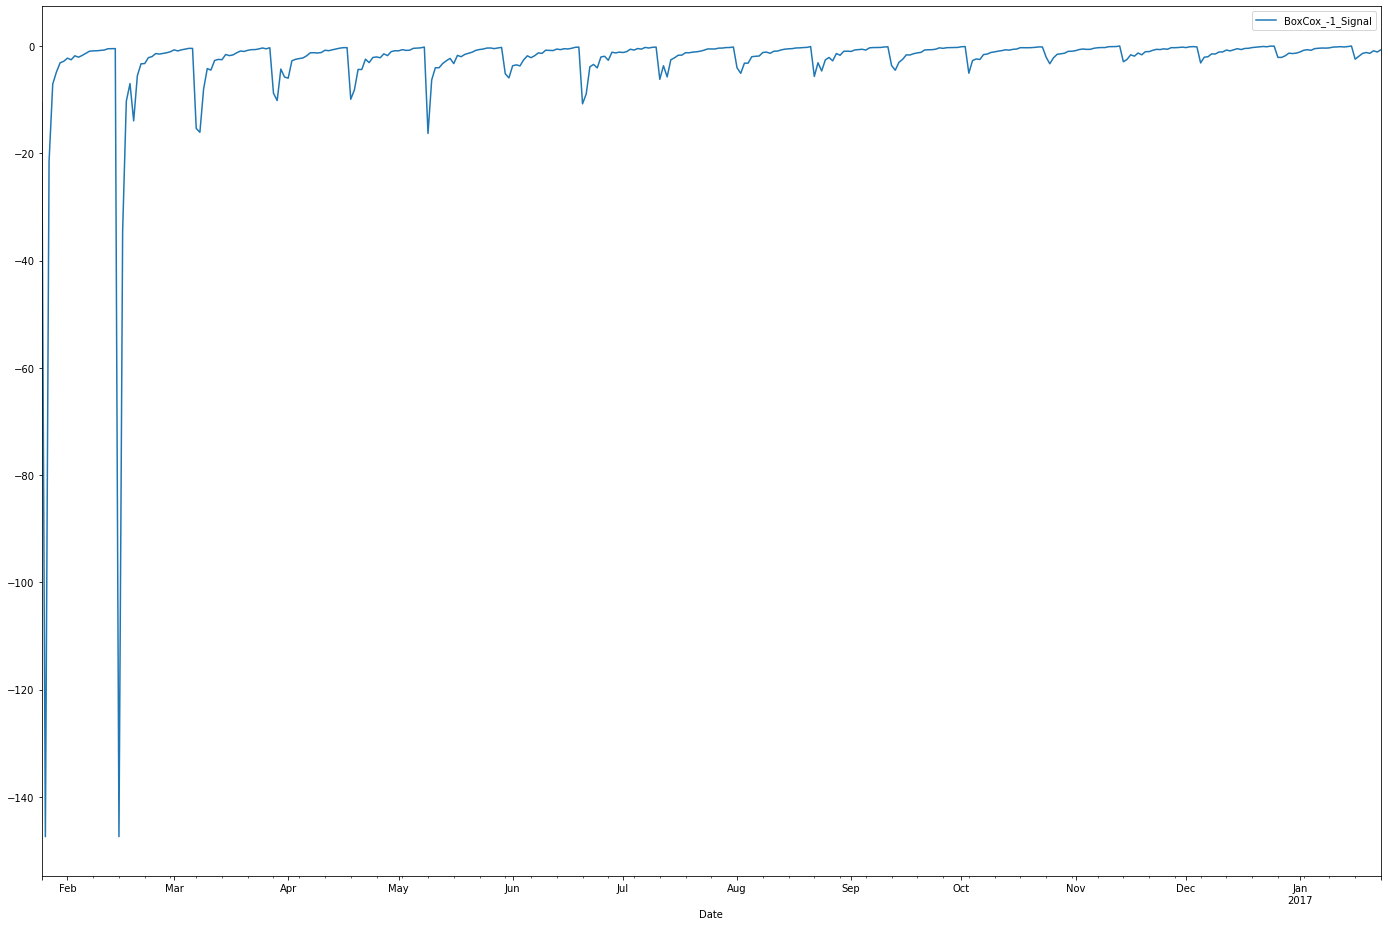

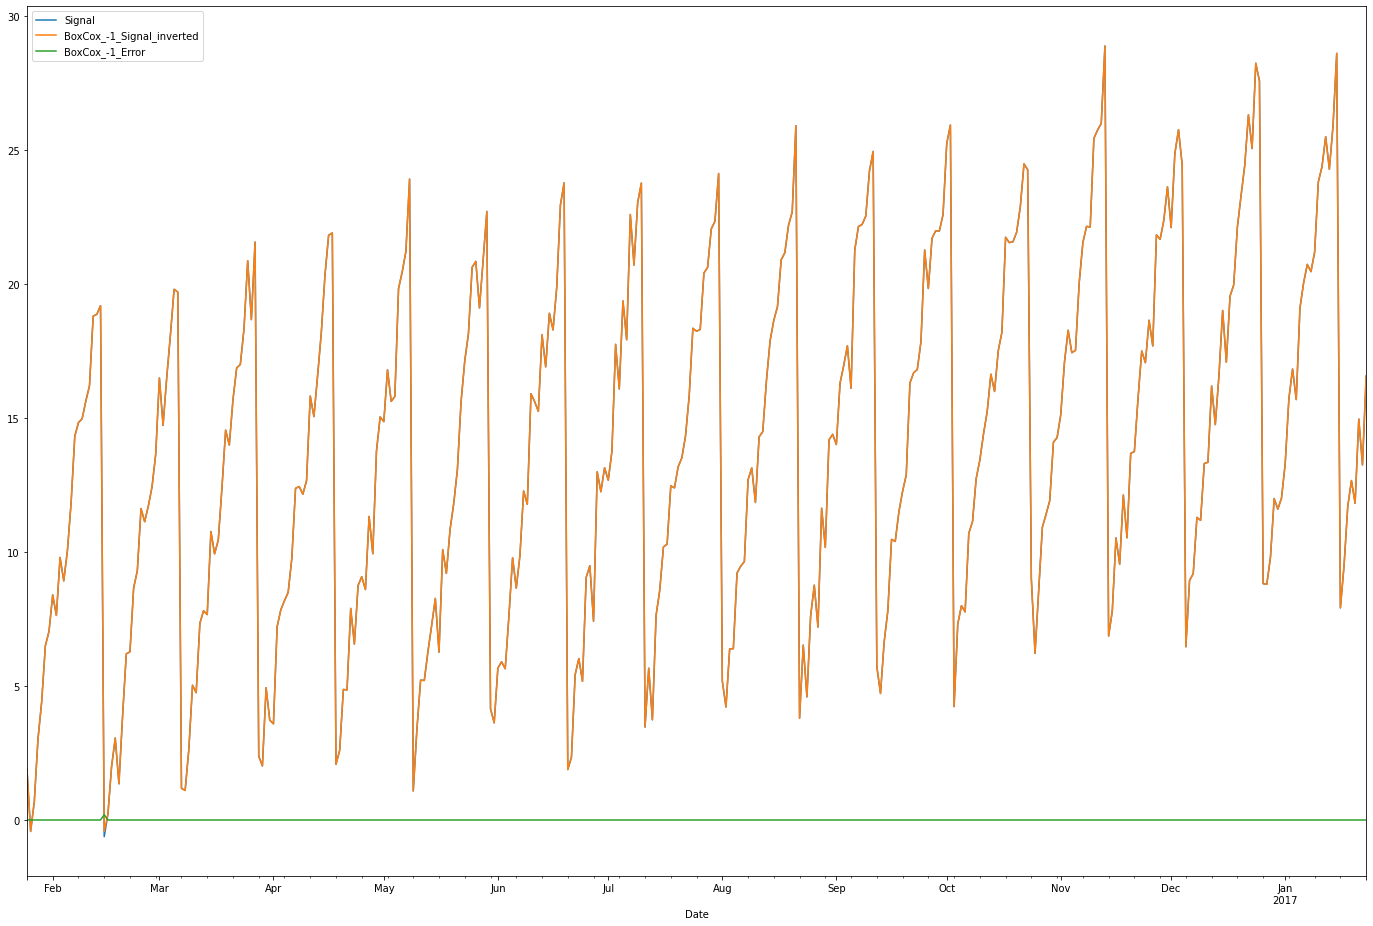

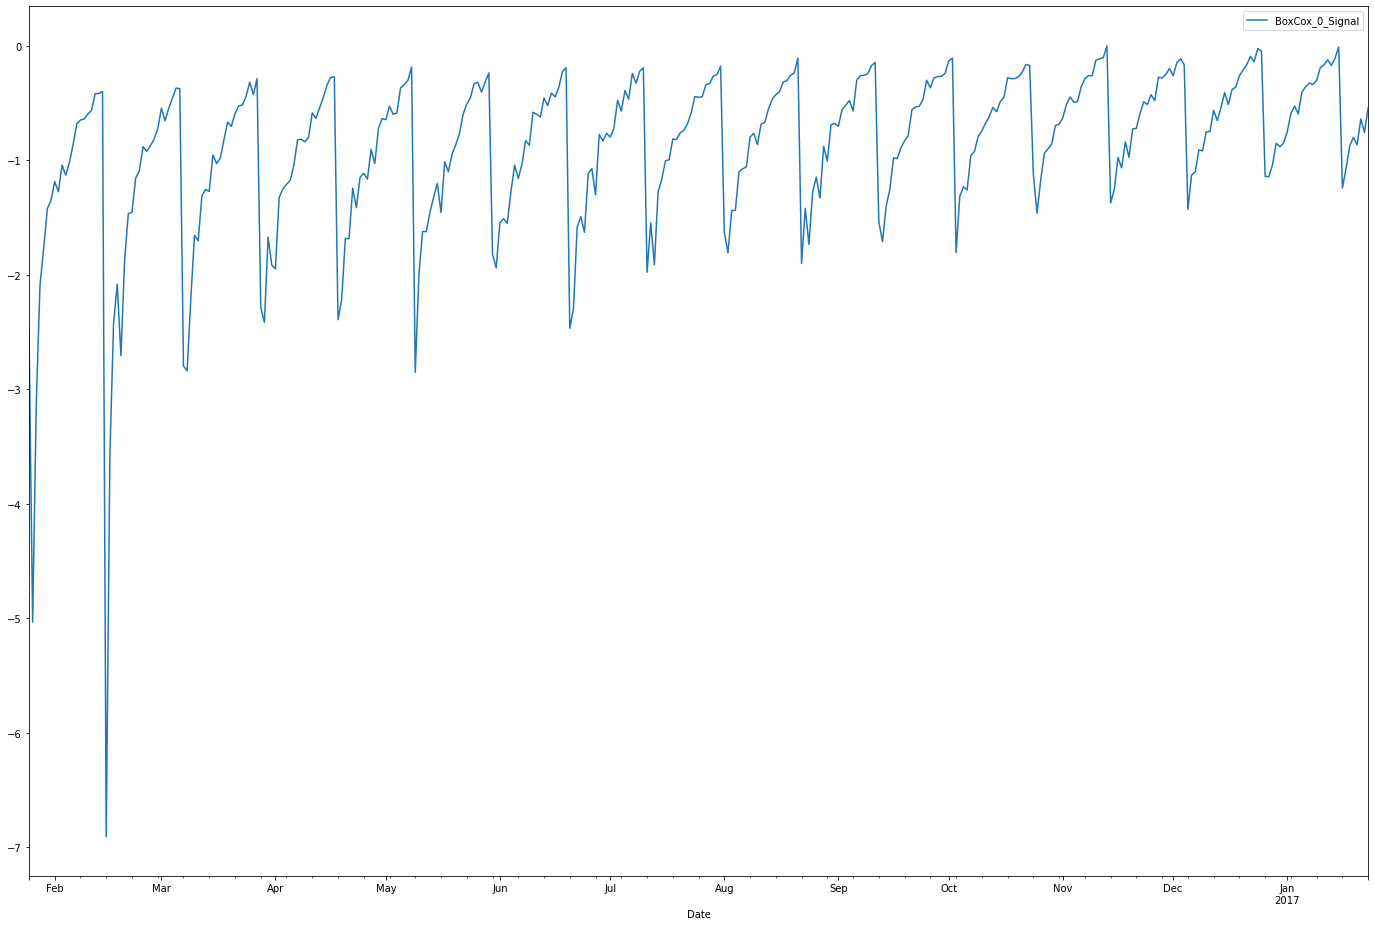

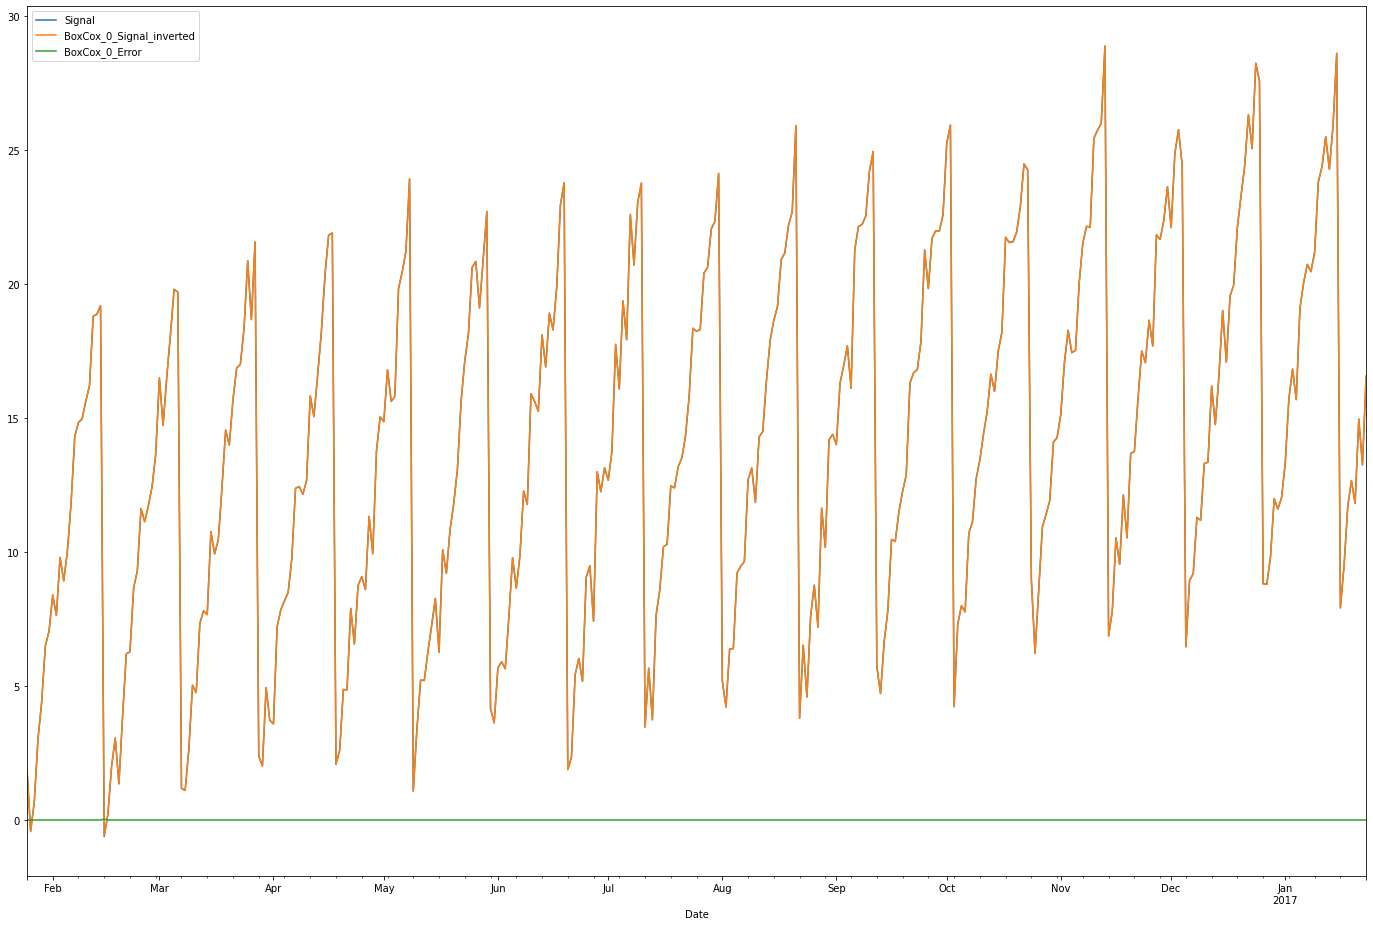

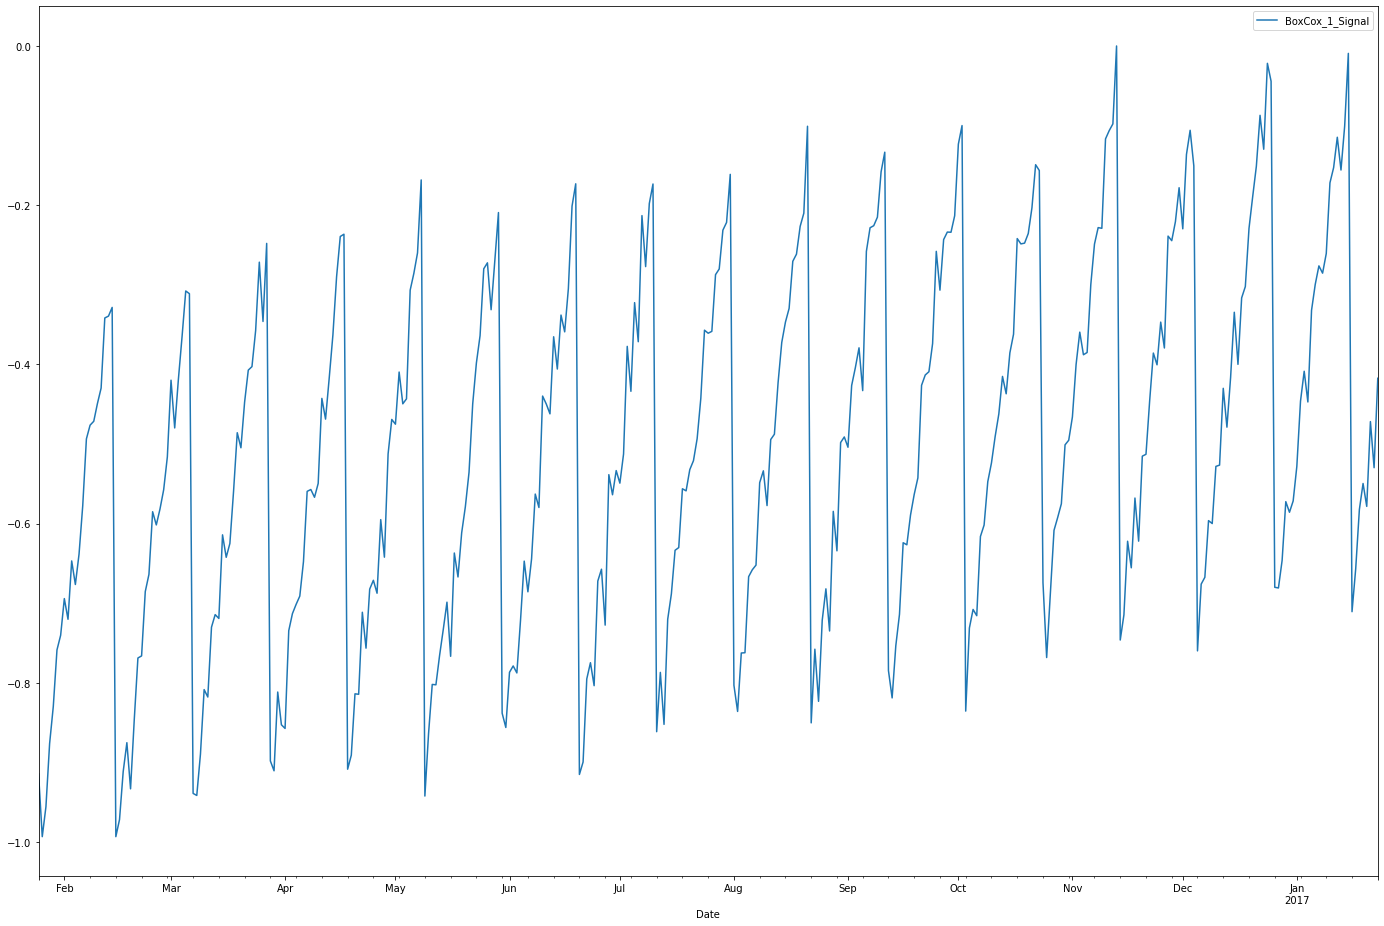

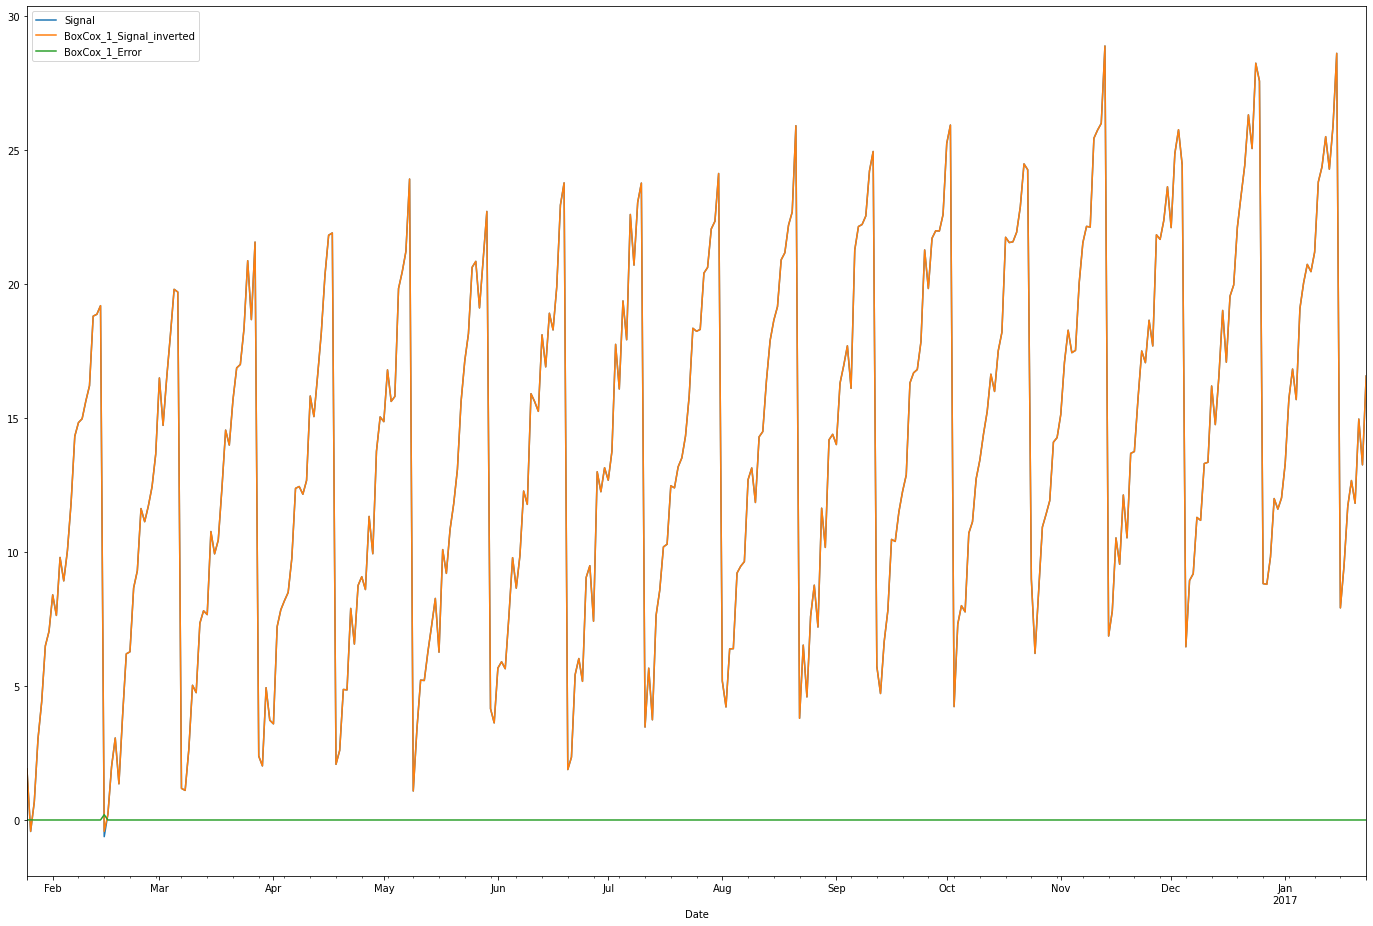

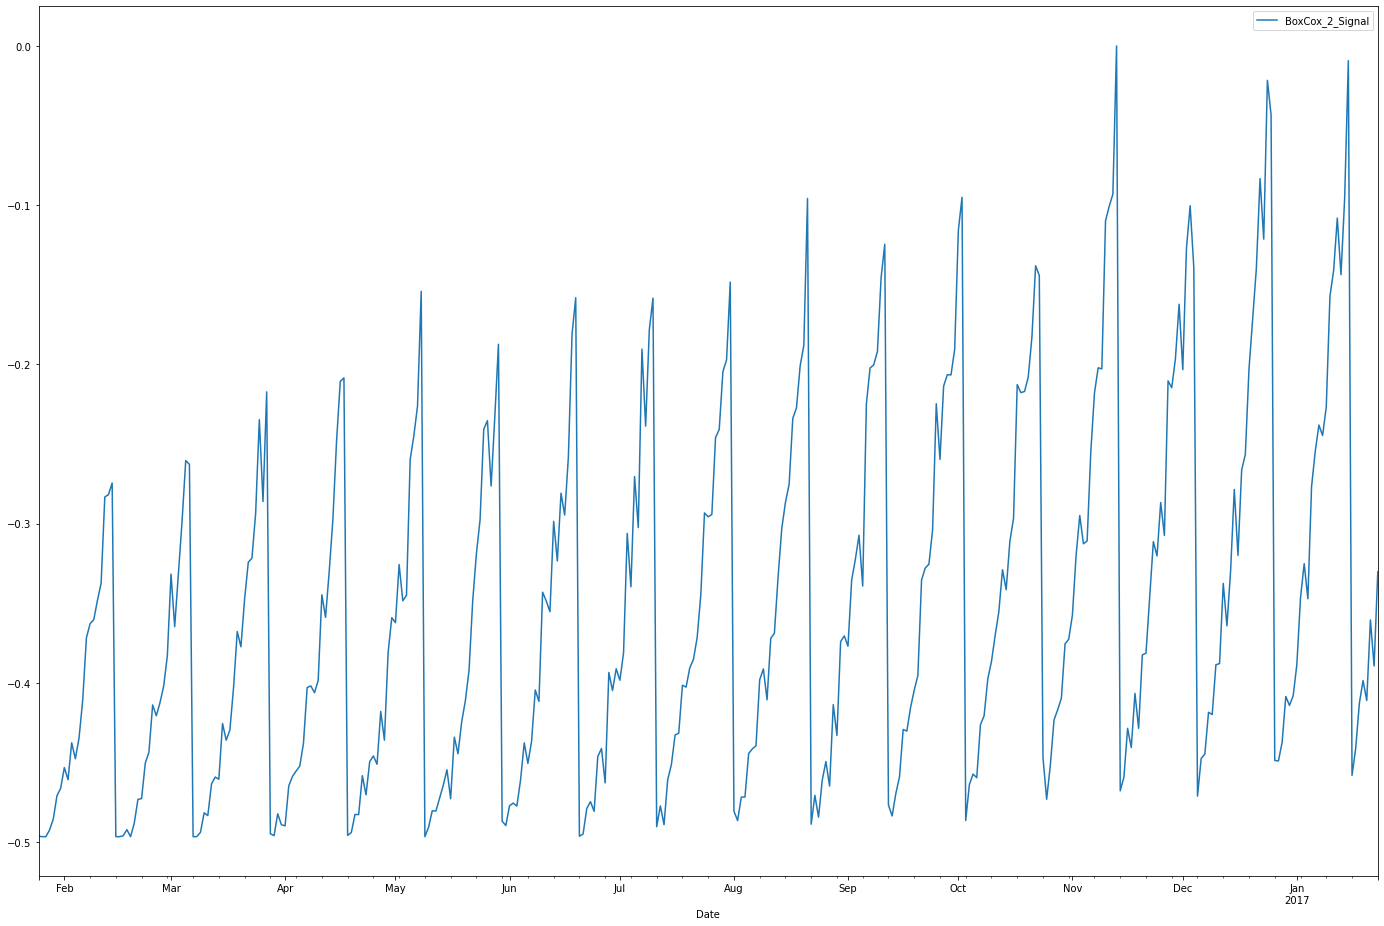

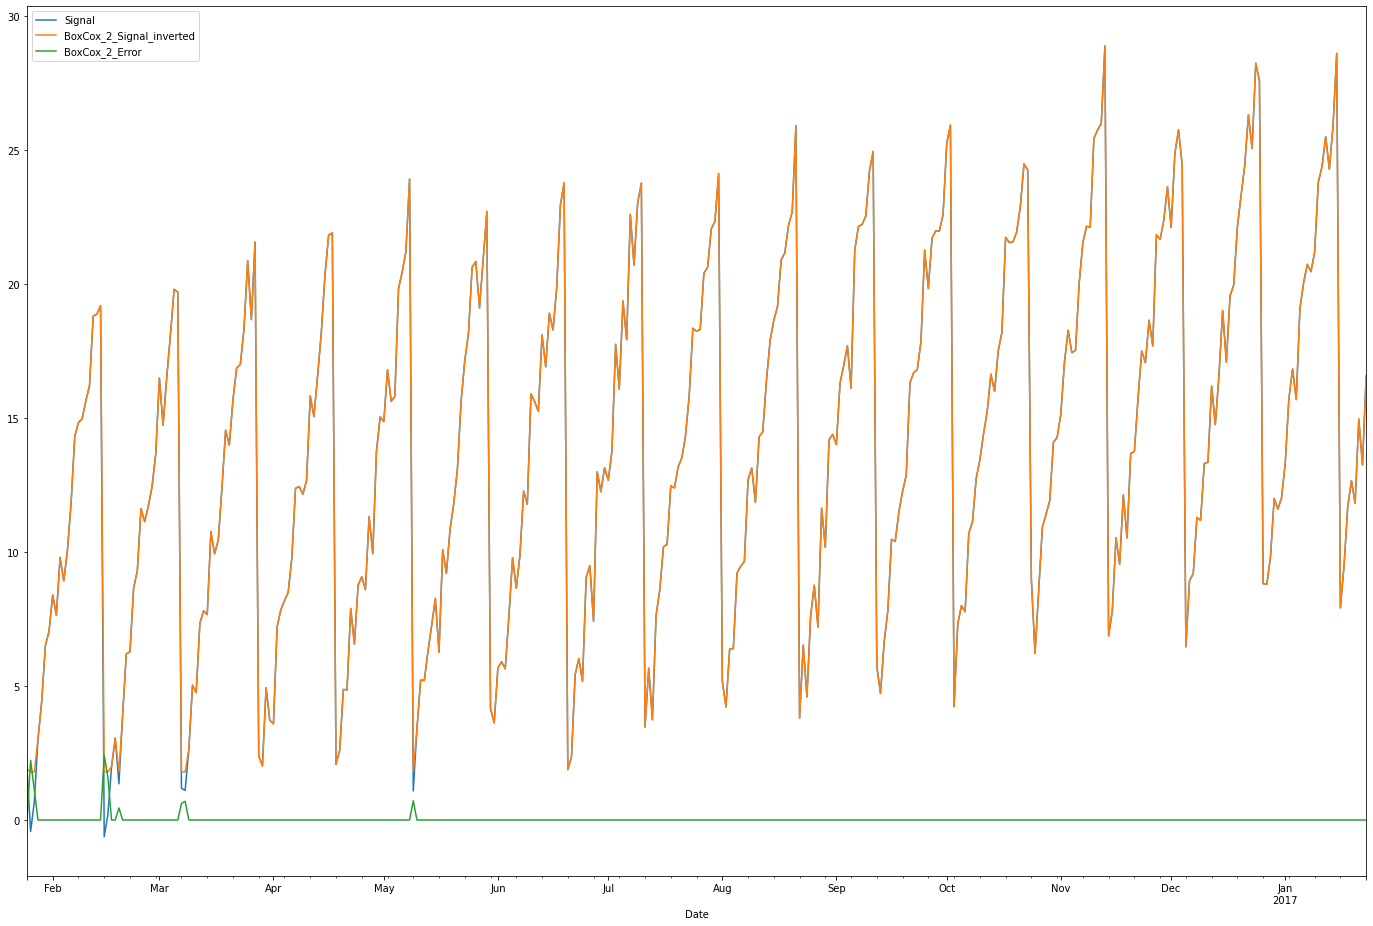

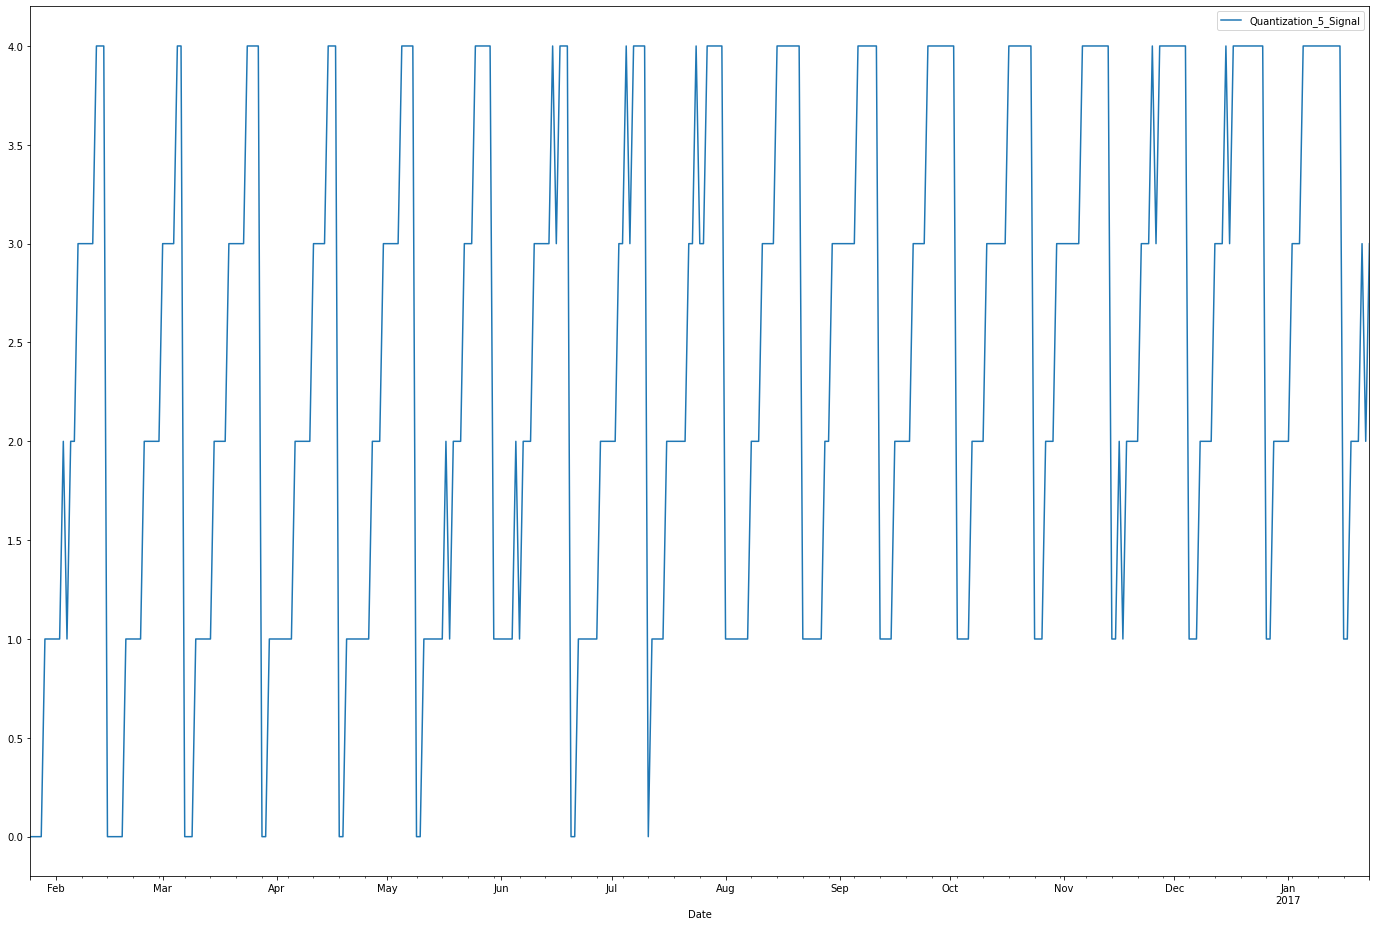

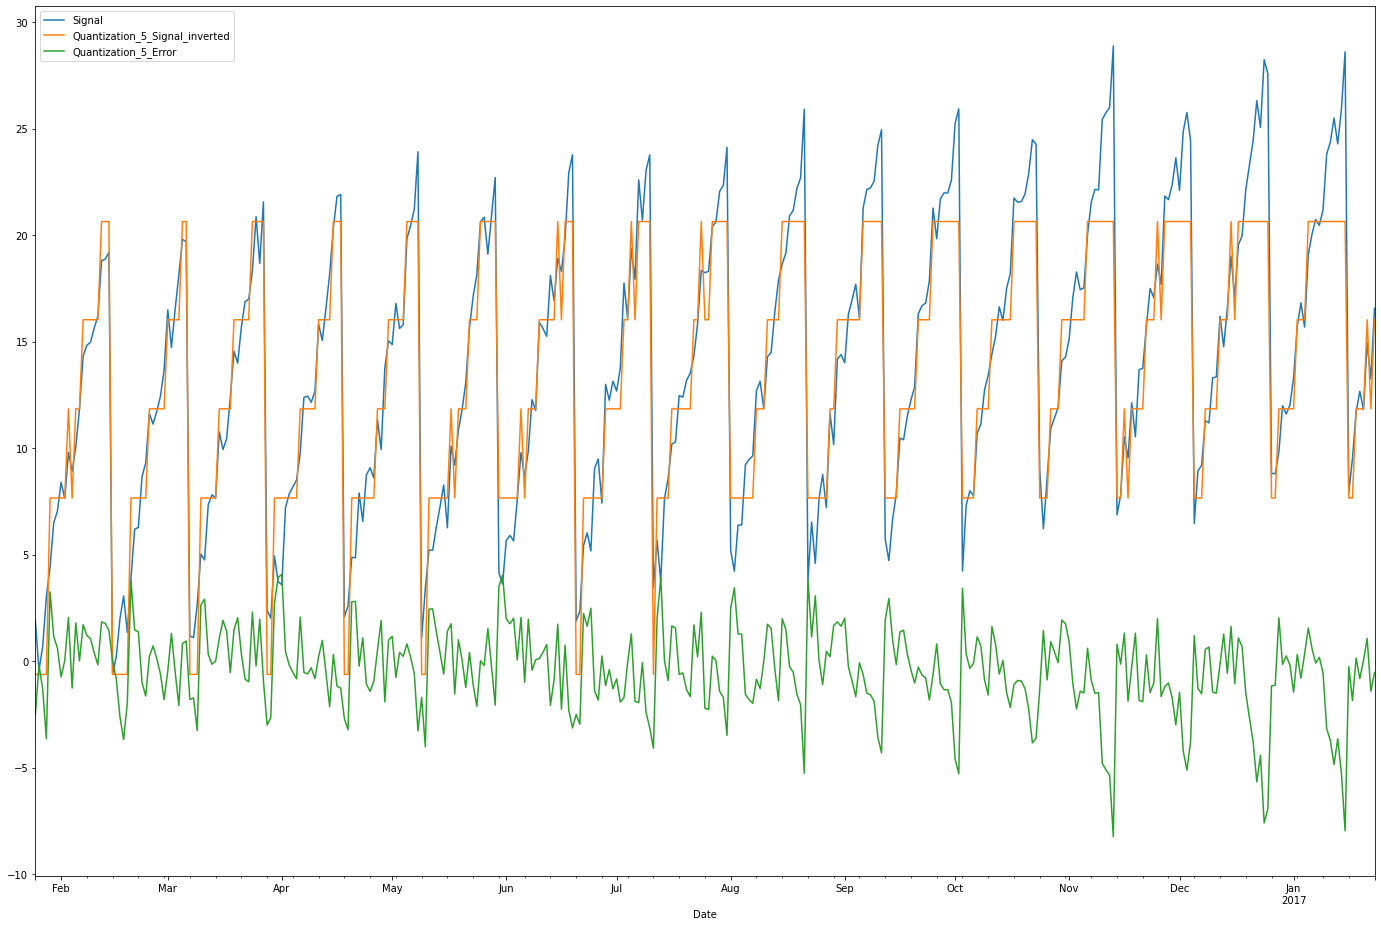

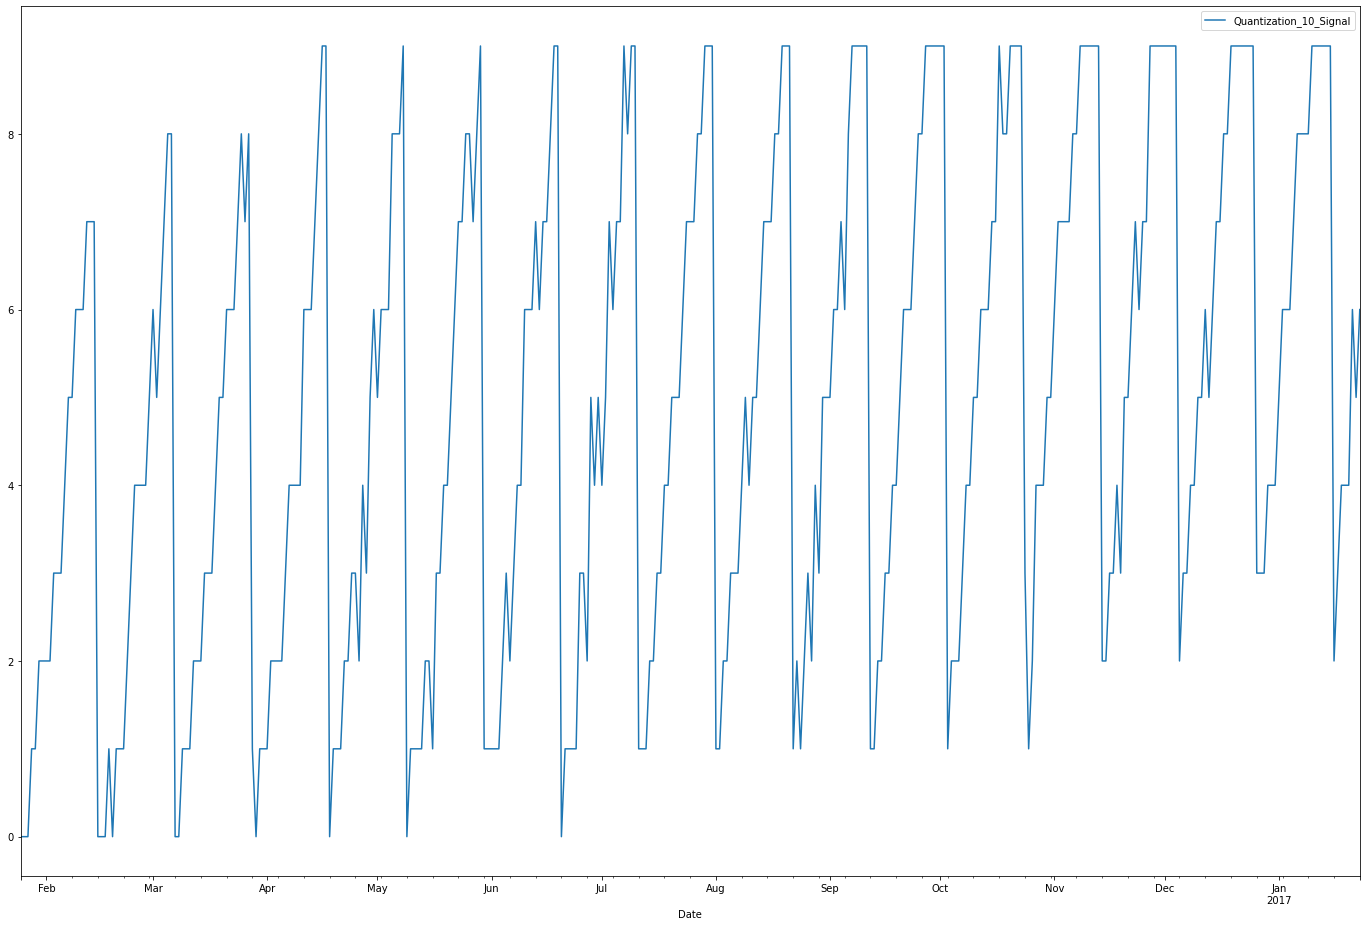

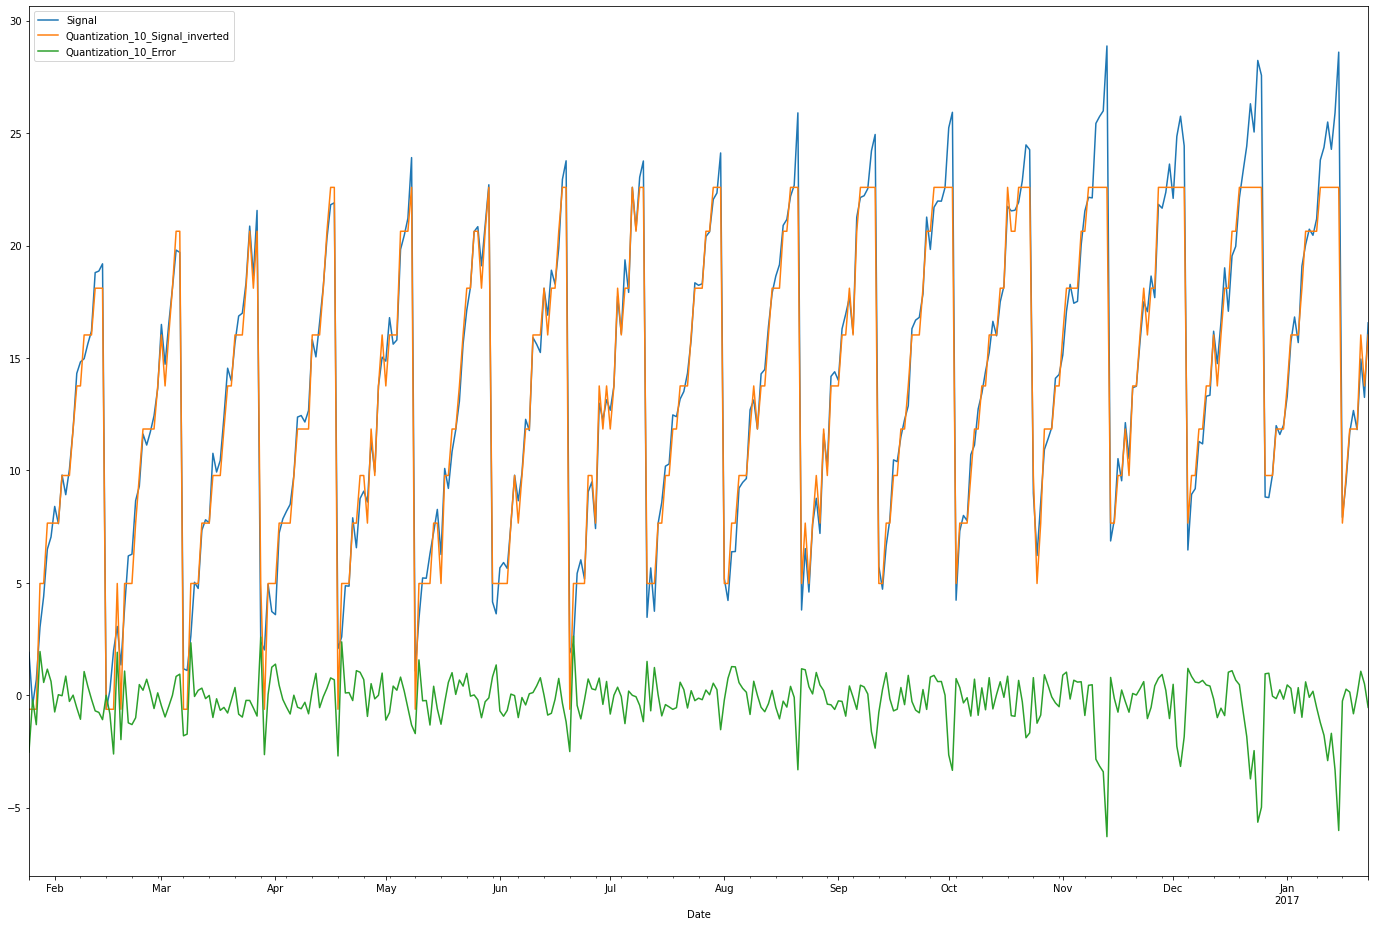

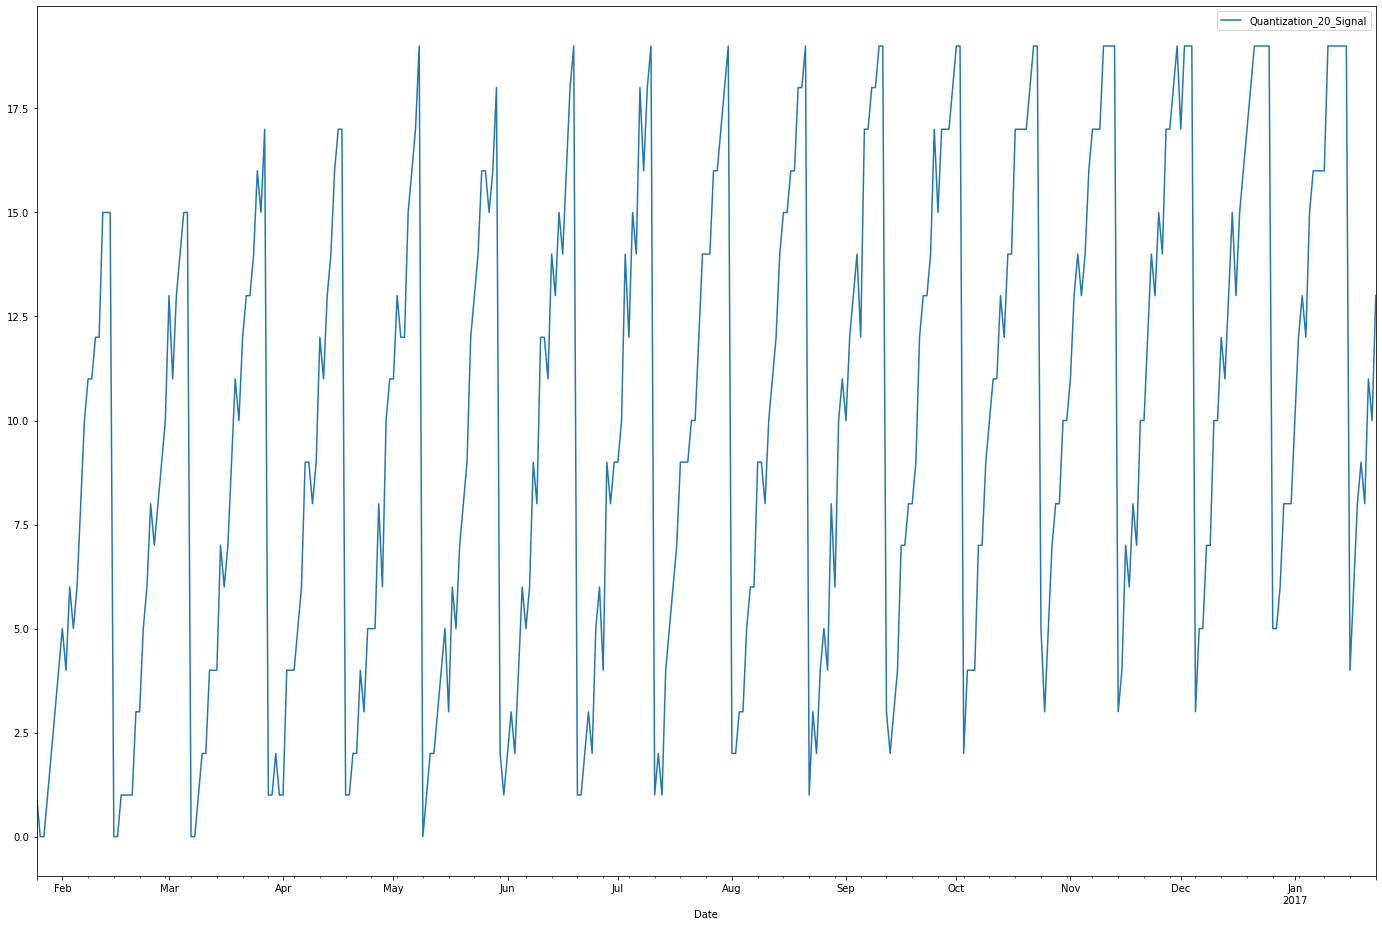

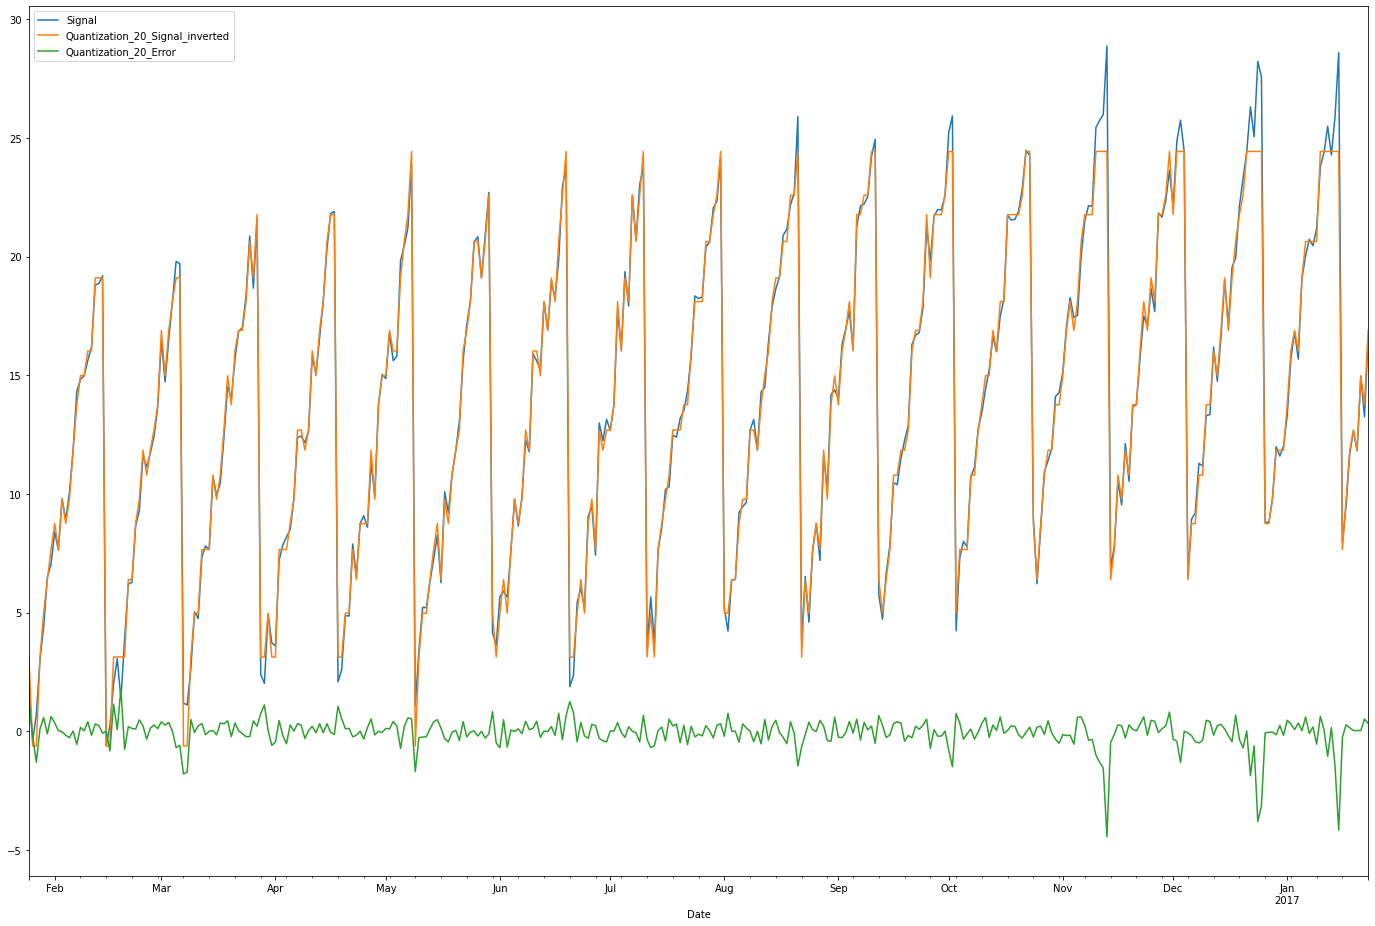

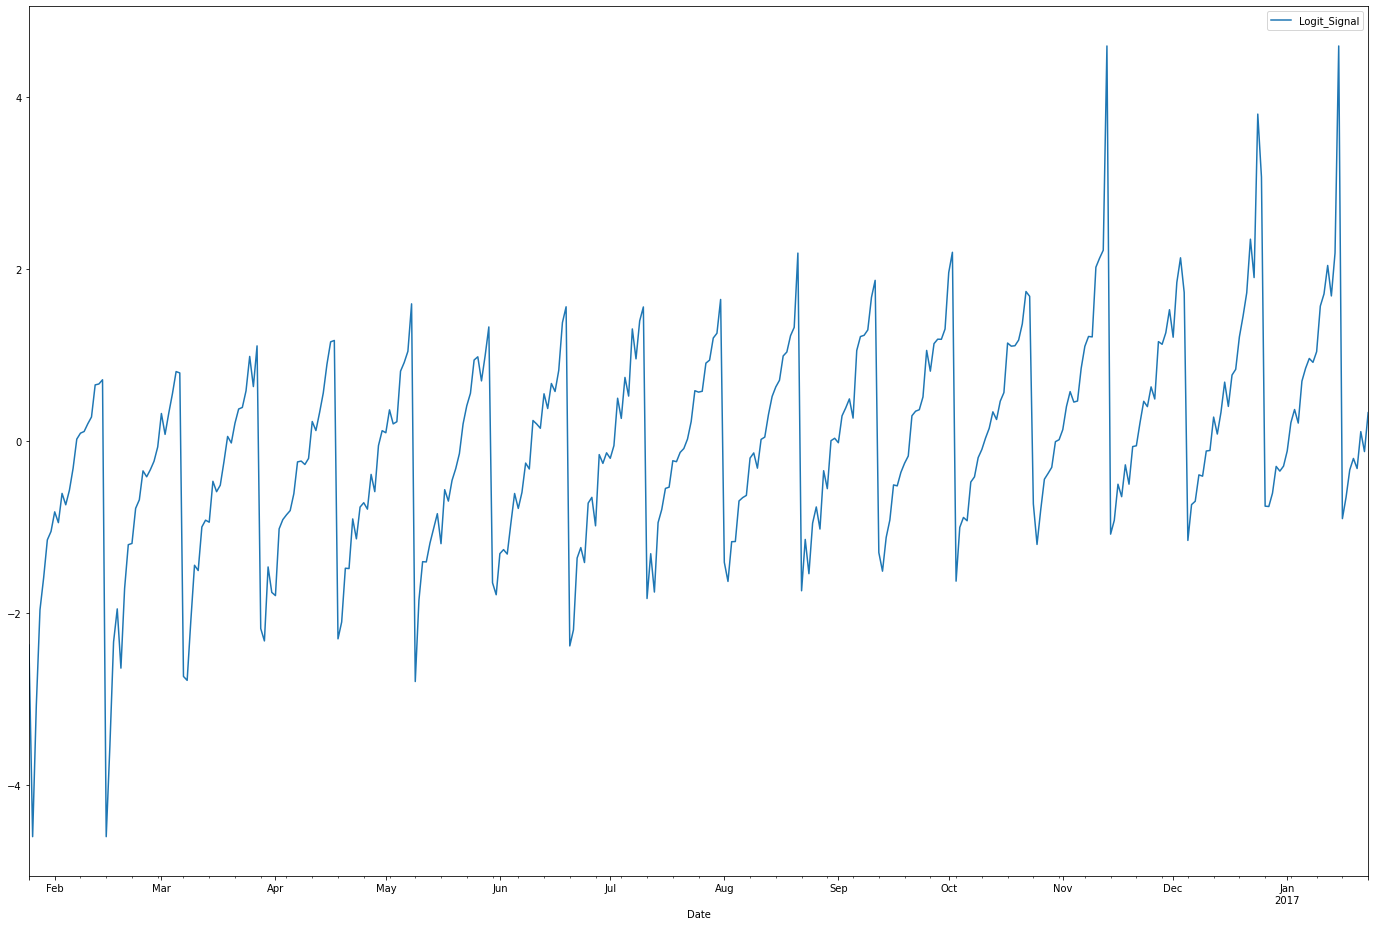

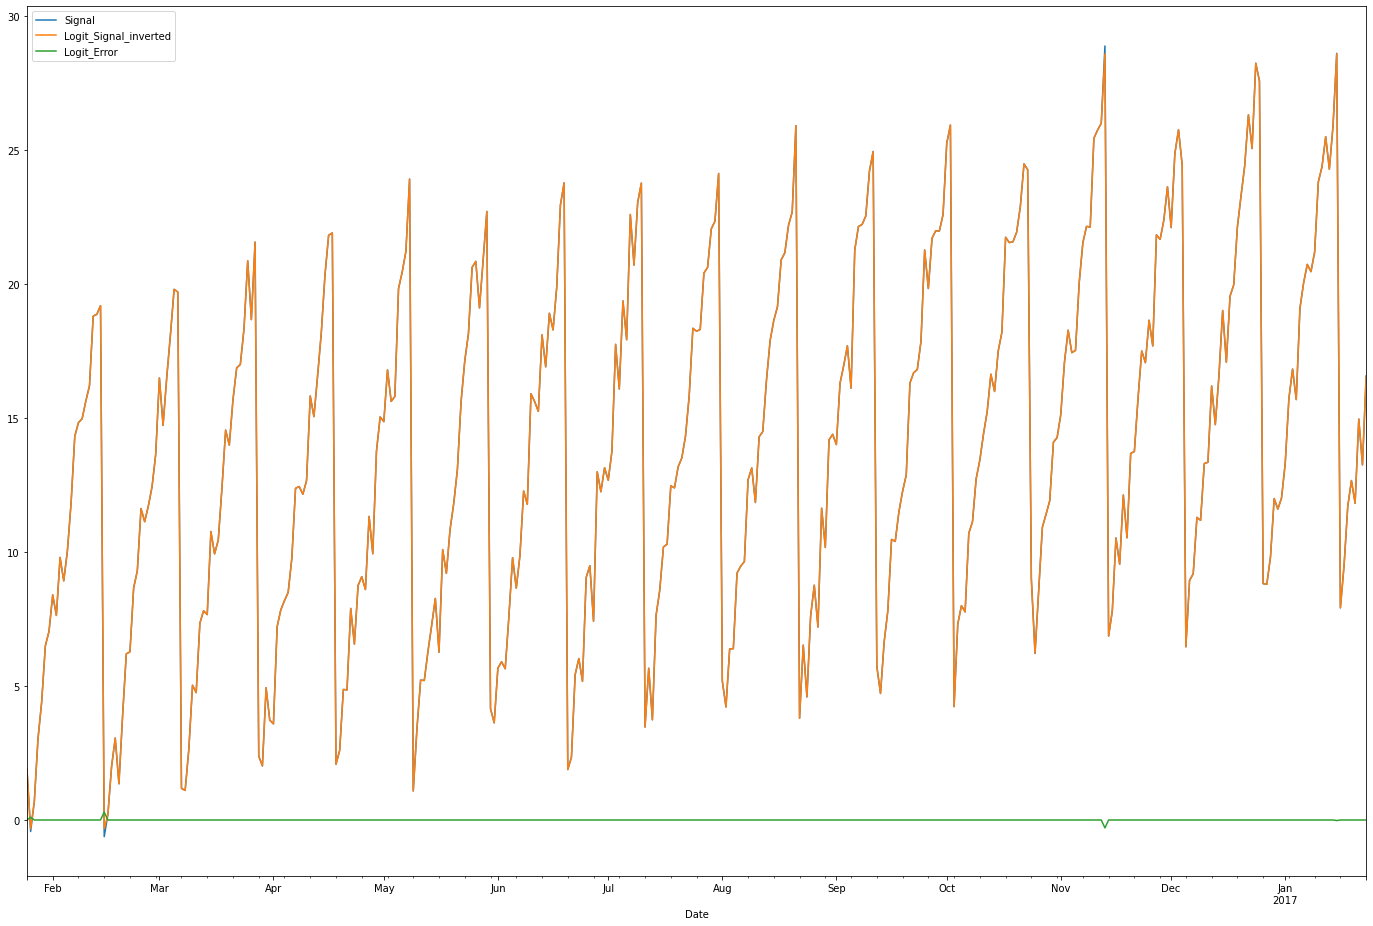

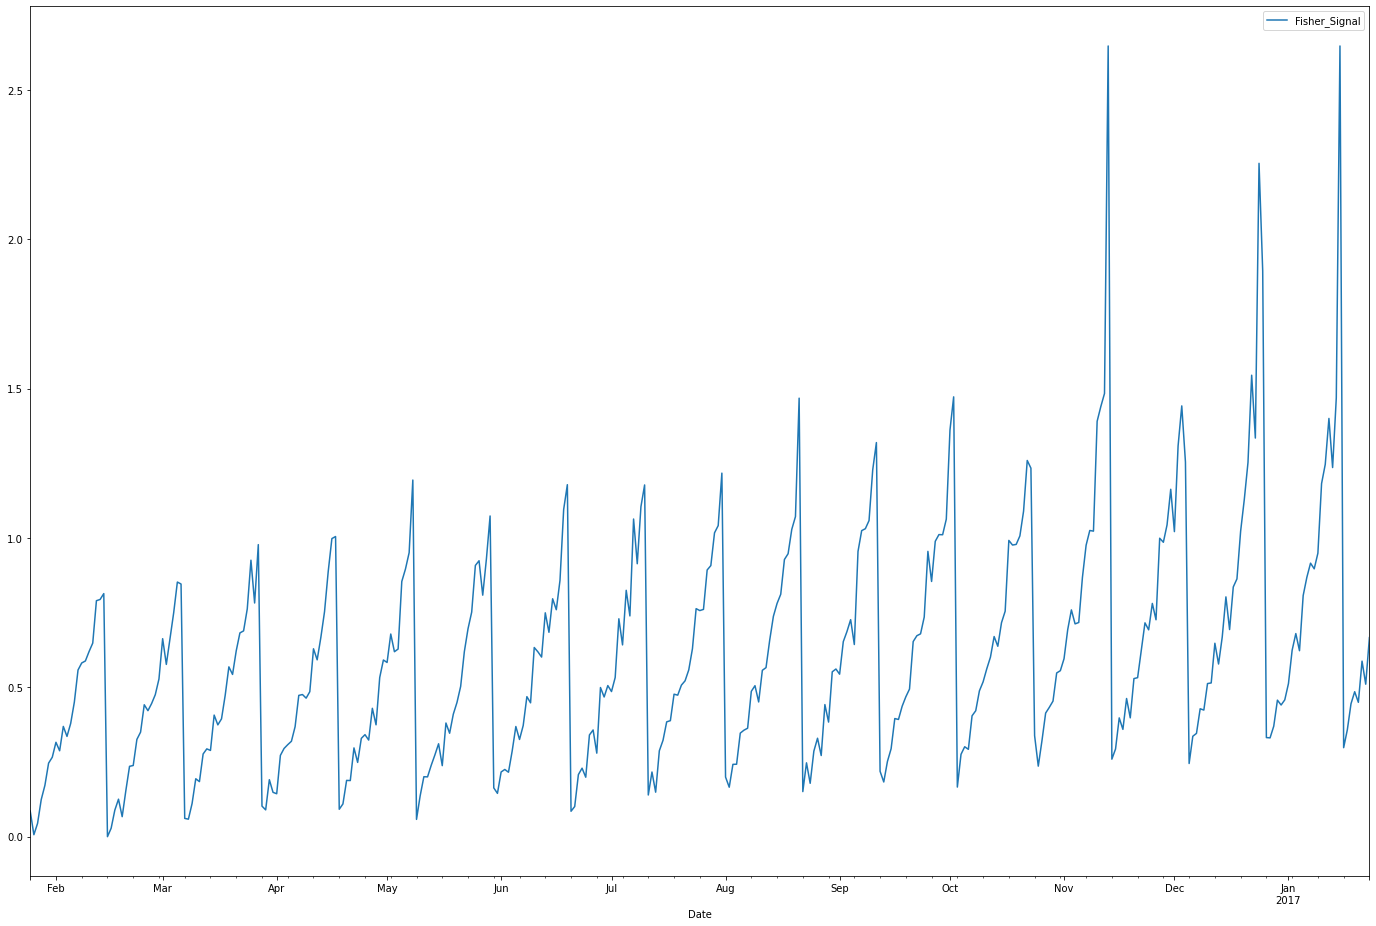

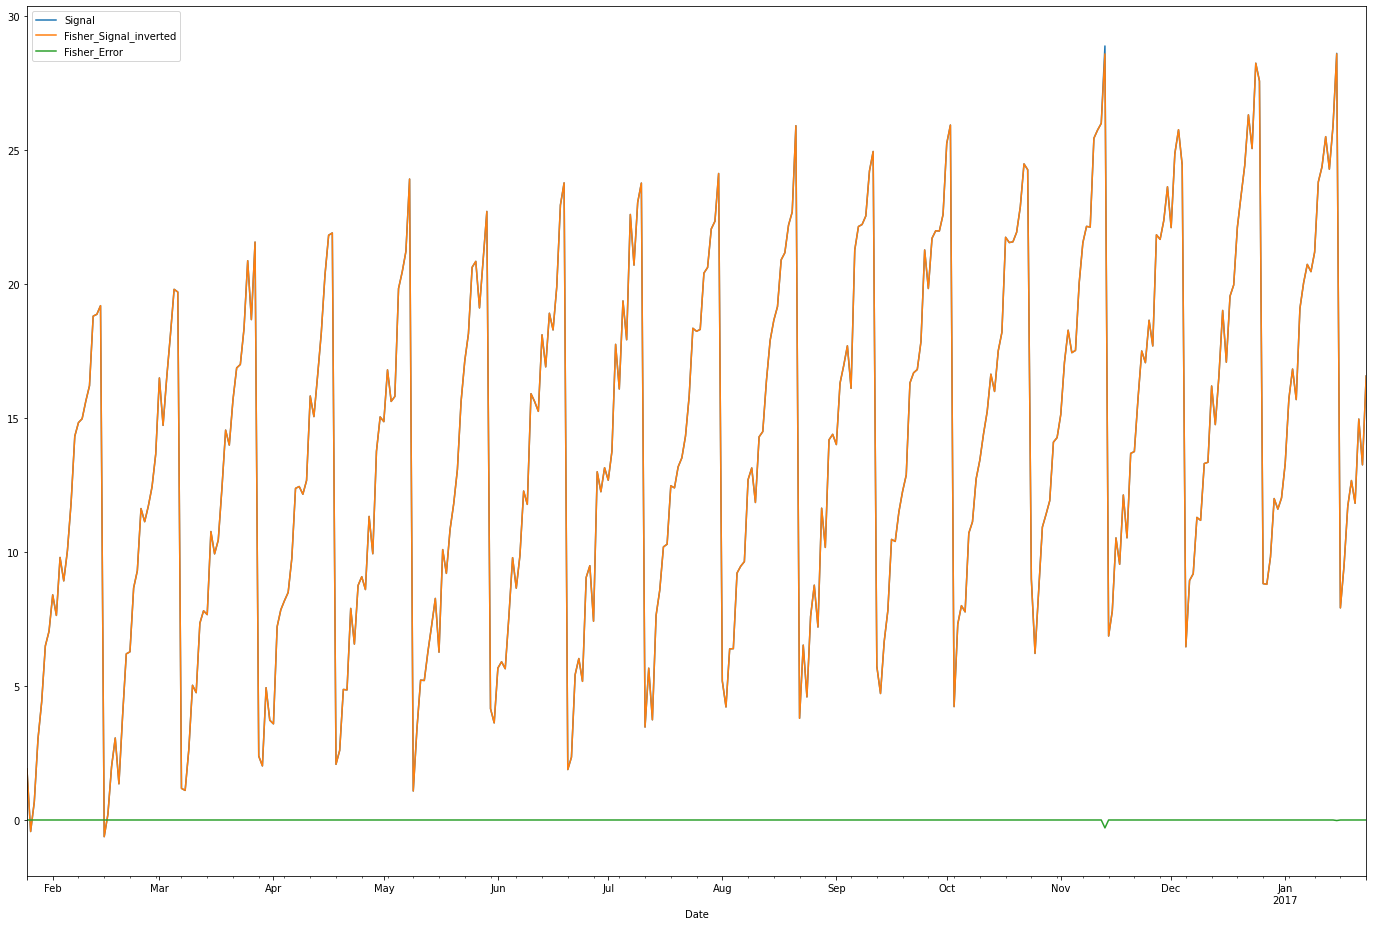

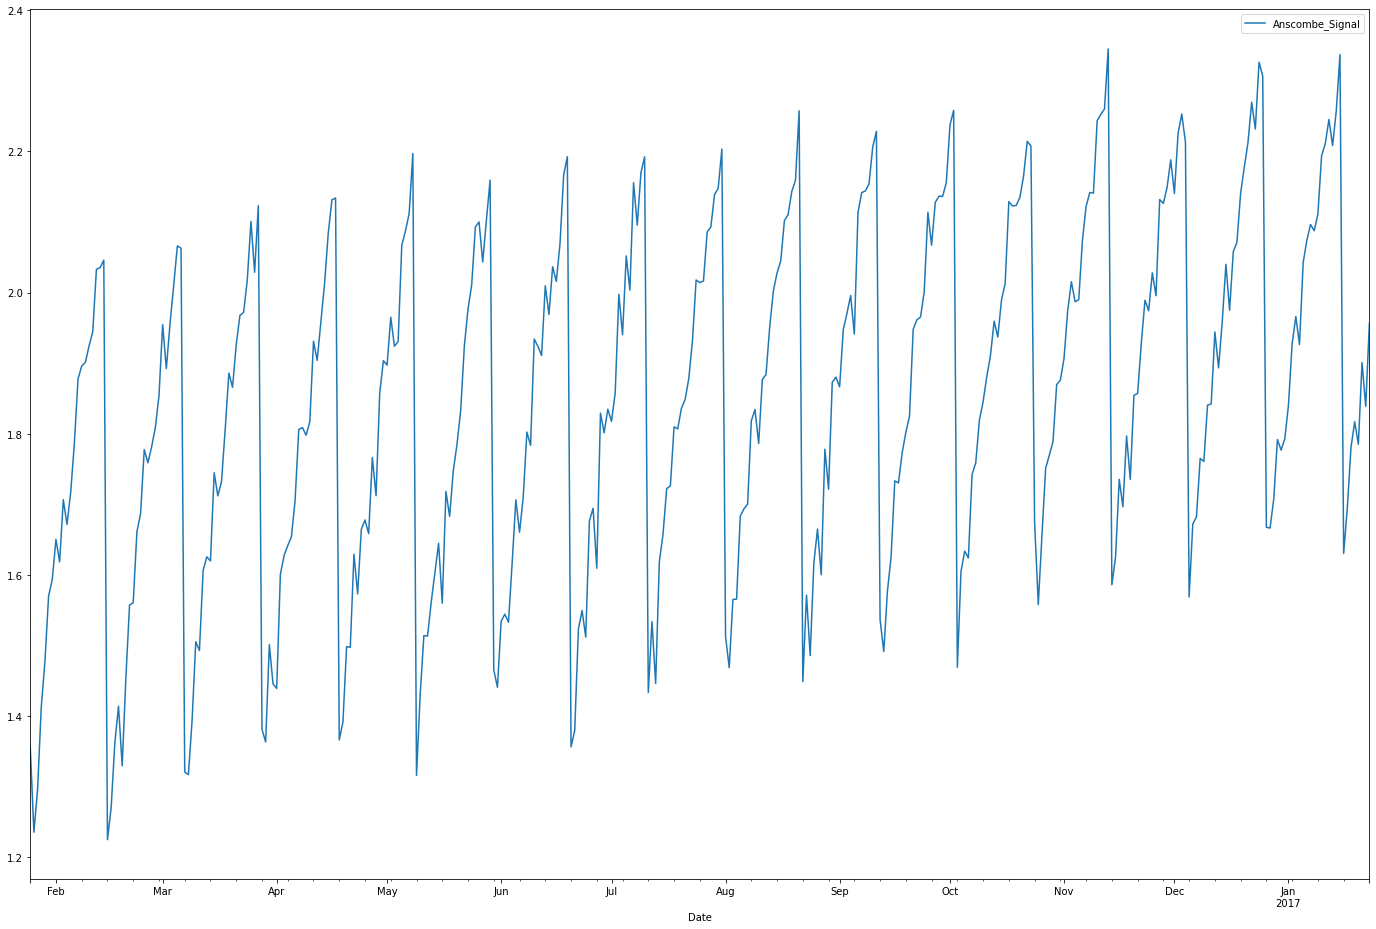

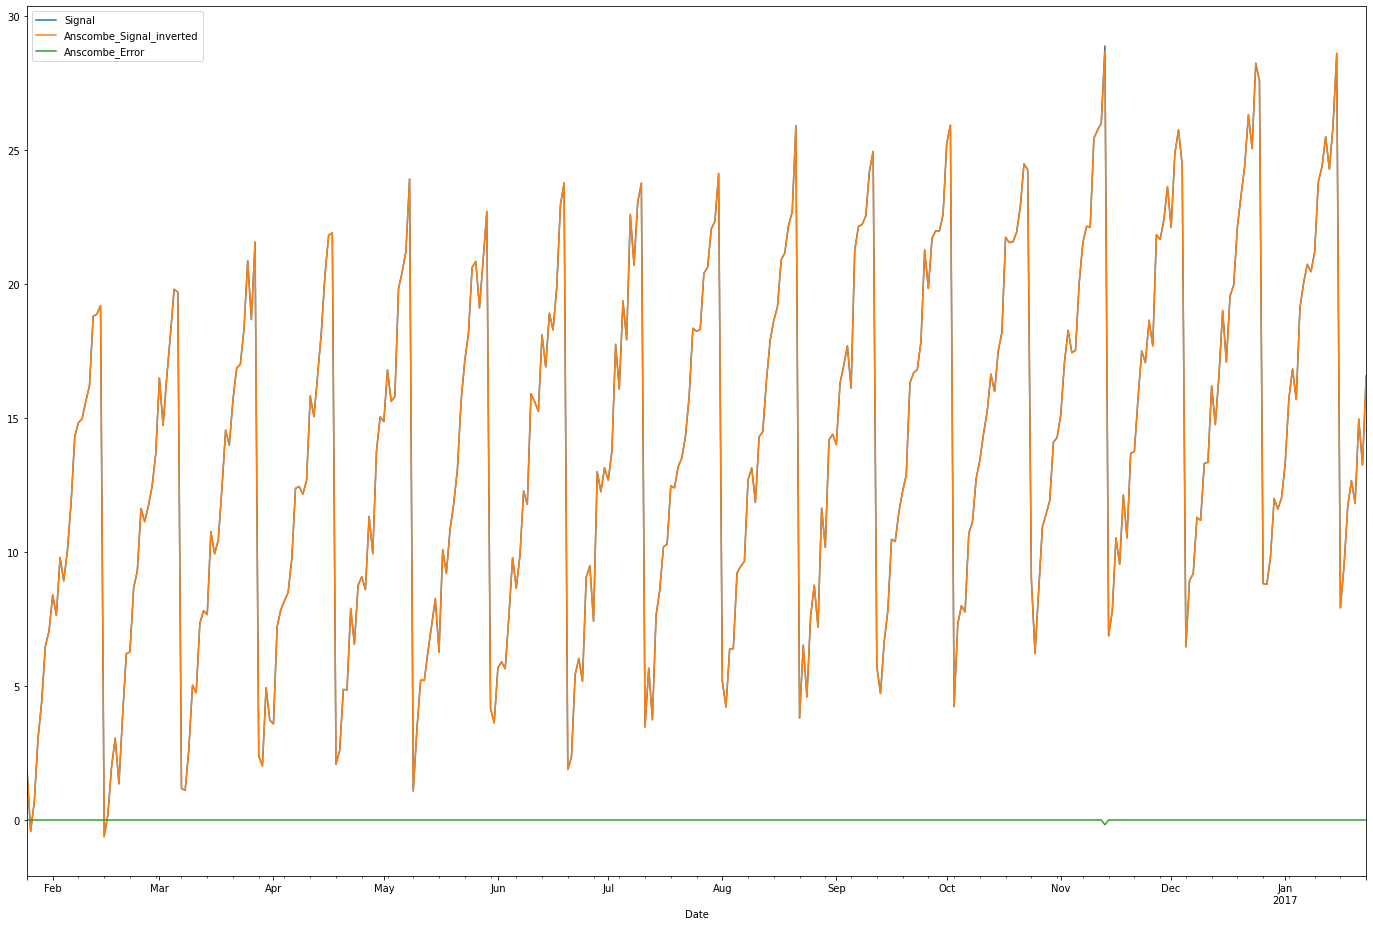

In [7]:
for tr in lKnonwTranformations:
    print("TESTING_TRANSFORMATION" , tr)
    plot_transformation(tr)
